In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [76]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [77]:
evaluation_datasets = [
    "D3RLPY-MP1",
    "D3RLPY-MP1_100000",
    "D3RLPY-MP1-P0-3",
    "D3RLPY-MP1-P1-4",
    "D3RLPY-MP1-P0_25000",
    "D3RLPY-MP1-P1_25000",
    "D3RLPY-MP1-P2_25000",
    "D3RLPY-MP1-P3_25000",
    "D3RLPY-MP1-P4_25000",
    "D3RLPY-MP1-P0_100000",
    "D3RLPY-MP1-P1_100000",
    "D3RLPY-MP1-P2_100000",
    "D3RLPY-MP1-P3_100000",
    "D3RLPY-MP1-P4_100000",
    "D3RLPY-MP2-P0_100000",
    "D3RLPY-MP2-P1_100000",
    "D3RLPY-MP2-P2_100000",
    "D3RLPY-MP2-P3_100000",
    "D3RLPY-MP2-P4_100000",
    "D3RLPY-MP3-P0_100000",
    "D3RLPY-MP3-P1_100000",
    "D3RLPY-MP3-P2_100000",
    "D3RLPY-MP3-P3_100000",
    "D3RLPY-MP3-P4_100000",
    "D3RLPY-PAP5",
    "D3RLPY-PAP5_100000",
    "D3RLPY-PAP5-P0-3",
    "D3RLPY-PAP5-P1-4",
    "D3RLPY-PAP5-P0_25000",
    "D3RLPY-PAP5-P1_25000",
    "D3RLPY-PAP5-P2_25000",
    "D3RLPY-PAP5-P3_25000",
    "D3RLPY-PAP5-P4_25000",
    "D3RLPY-PAP5-P0_100000",
    "D3RLPY-PAP5-P1_100000",
    "D3RLPY-PAP5-P2_100000",
    "D3RLPY-PAP5-P3_100000",
    "D3RLPY-PAP5-P4_100000",
    "D3RLPY-PAP6-P0_100000",
    "D3RLPY-PAP6-P1_100000",
    "D3RLPY-PAP6-P2_100000",
    "D3RLPY-PAP6-P3_100000",
    "D3RLPY-PAP6-P4_100000",
    "D3RLPY-PAP7-P0_100000",
    "D3RLPY-PAP7-P1_100000",
    "D3RLPY-PAP7-P2_100000",
    "D3RLPY-PAP7-P3_100000",
    "D3RLPY-PAP7-P4_100000",
    "RAND-1",
    "RAND-2",
    "RAND-3",
    "RAND-4",
    "RAND-5",
    "RAND-6",
    "RAND-7",
    "RAND-8",
    "RAND-9",
    "RAND-10",
    "RAND-D3RLPY-MP1-P0-1",
    "RAND-D3RLPY-MP1-P1-1",
    "RAND-D3RLPY-MP1-P2-1",
    "RAND-D3RLPY-MP1-P3-1",
    "RAND-D3RLPY-MP1-P4-1",
    "RAND-D3RLPY-PAP5-P0-1",
    "RAND-D3RLPY-PAP5-P1-1",
    "RAND-D3RLPY-PAP5-P2-1",
    "RAND-D3RLPY-PAP5-P3-1",
    "RAND-D3RLPY-PAP5-P4-1",
    # "NOISE-D3RLPY-MP1-P0-1",
    # "NOISE-D3RLPY-MP1-P1-1",
    # "NOISE-D3RLPY-MP1-P2-1",
    # "NOISE-D3RLPY-MP1-P3-1",
    # "NOISE-D3RLPY-MP1-P4-1",
    # "NOISE-D3RLPY-PAP5-P0-1",
    # "NOISE-D3RLPY-PAP5-P1-1",
    # "NOISE-D3RLPY-PAP5-P2-1",
    # "NOISE-D3RLPY-PAP5-P3-1",
    # "NOISE-D3RLPY-PAP5-P4-1",
]

training_datasets = [
    "D3RLPY-PAP5-P0_25000",
    "D3RLPY-PAP5-P1_25000",
    "D3RLPY-PAP5-P2_25000",
    "D3RLPY-PAP5-P3_25000",
]

experiments_original_no_rex = ['MP134', 'MP135', 'MP136']
experiments_original        = ['MP101', 'MP105', 'MP109']

experiments_mse_no_rex = ['MP165', 'MP166', 'MP167']
experiments_mse_01     = ['MP168', 'MP169', 'MP170']
experiments_mse_1      = ['MP171', 'MP172', 'MP173']
experiments_mse_10     = ['MP174', 'MP175', 'MP176']

experiments_mse_tot_001_no_rex = ['MP199', 'MP200', 'MP201']
experiments_mse_tot_001_10     = ['MP183', 'MP184', 'MP185']
experiments_mse_tot_001_1      = ['MP186', 'MP187', 'MP188']

experiments_mse_tot_01_no_rex = ['MP232', 'MP233', 'MP234']
experiments_mse_tot_01_01     = ['MP235', 'MP236', 'MP237']
experiments_mse_tot_01_1      = ['MP238', 'MP239', 'MP240']
experiments_mse_tot_01_10     = ['MP241', 'MP242', 'MP243']

experiments_ll_no_rex = ['MP193', 'MP195', 'MP197']
experiments_ll        = ['MP194', 'MP196', 'MP198']

In [78]:
scores_original_no_rex_df = get_scores_df(experiments_original_no_rex, evaluation_datasets)
scores_original_df = get_scores_df(experiments_original, evaluation_datasets)

scores_mse_no_rex_df = get_scores_df(experiments_mse_no_rex, evaluation_datasets)
scores_mse_01_df = get_scores_df(experiments_mse_01, evaluation_datasets)
scores_mse_1_df = get_scores_df(experiments_mse_1, evaluation_datasets)
scores_mse_10_df = get_scores_df(experiments_mse_10, evaluation_datasets)

scores_mse_tot_001_no_rex_df = get_scores_df(experiments_mse_tot_001_no_rex, evaluation_datasets)
scores_mse_tot_001_1_df = get_scores_df(experiments_mse_tot_001_1, evaluation_datasets)
scores_mse_tot_001_10_df = get_scores_df(experiments_mse_tot_001_10, evaluation_datasets)

scores_mse_tot_01_no_rex_df = get_scores_df(experiments_mse_tot_01_no_rex, evaluation_datasets)
scores_mse_tot_01_01_df = get_scores_df(experiments_mse_tot_01_01, evaluation_datasets)
scores_mse_tot_01_1_df = get_scores_df(experiments_mse_tot_01_1, evaluation_datasets)
scores_mse_tot_01_10_df = get_scores_df(experiments_mse_tot_01_10, evaluation_datasets)

scores_ll_no_rex_df = get_scores_df(experiments_ll_no_rex, evaluation_datasets)
scores_ll_df = get_scores_df(experiments_ll, evaluation_datasets)

In [79]:
scores_original_no_rex_groups = (
    scores_original_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_original_no_rex_avgs_df = scores_original_no_rex_groups.mean().reset_index()
scores_original_no_rex_mins_df = scores_original_no_rex_groups.min().reset_index()
scores_original_no_rex_maxs_df = scores_original_no_rex_groups.max().reset_index()

scores_original_groups = (
    scores_original_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_original_avgs_df = scores_original_groups.mean().reset_index()
scores_original_mins_df = scores_original_groups.min().reset_index()
scores_original_maxs_df = scores_original_groups.max().reset_index()

scores_mse_no_rex_groups = (
    scores_mse_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_no_rex_avgs_df = scores_mse_no_rex_groups.mean().reset_index()
scores_mse_no_rex_mins_df = scores_mse_no_rex_groups.min().reset_index()
scores_mse_no_rex_maxs_df = scores_mse_no_rex_groups.max().reset_index()

scores_mse_01_groups = (
    scores_mse_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_01_avgs_df = scores_mse_01_groups.mean().reset_index()
scores_mse_01_mins_df = scores_mse_01_groups.min().reset_index()
scores_mse_01_maxs_df = scores_mse_01_groups.max().reset_index()

scores_mse_1_groups = (
    scores_mse_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_1_avgs_df = scores_mse_1_groups.mean().reset_index()
scores_mse_1_mins_df = scores_mse_1_groups.min().reset_index()
scores_mse_1_maxs_df = scores_mse_1_groups.max().reset_index()

scores_mse_10_groups = (
    scores_mse_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_10_avgs_df = scores_mse_10_groups.mean().reset_index()
scores_mse_10_mins_df = scores_mse_10_groups.min().reset_index()
scores_mse_10_maxs_df = scores_mse_10_groups.max().reset_index()

scores_mse_tot_001_no_rex_groups = (
    scores_mse_tot_001_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_001_no_rex_avgs_df = scores_mse_tot_001_no_rex_groups.mean().reset_index()
scores_mse_tot_001_no_rex_mins_df = scores_mse_tot_001_no_rex_groups.min().reset_index()
scores_mse_tot_001_no_rex_maxs_df = scores_mse_tot_001_no_rex_groups.max().reset_index()

scores_mse_tot_001_1_groups = (
    scores_mse_tot_001_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_001_1_avgs_df = scores_mse_tot_001_1_groups.mean().reset_index()
scores_mse_tot_001_1_mins_df = scores_mse_tot_001_1_groups.min().reset_index()
scores_mse_tot_001_1_maxs_df = scores_mse_tot_001_1_groups.max().reset_index()

scores_mse_tot_001_10_groups = (
    scores_mse_tot_001_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_001_10_avgs_df = scores_mse_tot_001_10_groups.mean().reset_index()
scores_mse_tot_001_10_mins_df = scores_mse_tot_001_10_groups.min().reset_index()
scores_mse_tot_001_10_maxs_df = scores_mse_tot_001_10_groups.max().reset_index()

scores_mse_tot_01_no_rex_groups = (
    scores_mse_tot_01_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_01_no_rex_avgs_df = scores_mse_tot_01_no_rex_groups.mean().reset_index()
scores_mse_tot_01_no_rex_mins_df = scores_mse_tot_01_no_rex_groups.min().reset_index()
scores_mse_tot_01_no_rex_maxs_df = scores_mse_tot_01_no_rex_groups.max().reset_index()

scores_mse_tot_01_01_groups = (
    scores_mse_tot_01_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_01_01_avgs_df = scores_mse_tot_01_01_groups.mean().reset_index()
scores_mse_tot_01_01_mins_df = scores_mse_tot_01_01_groups.min().reset_index()
scores_mse_tot_01_01_maxs_df = scores_mse_tot_01_01_groups.max().reset_index()

scores_mse_tot_01_1_groups = (
    scores_mse_tot_01_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_01_1_avgs_df = scores_mse_tot_01_1_groups.mean().reset_index()
scores_mse_tot_01_1_mins_df = scores_mse_tot_01_1_groups.min().reset_index()
scores_mse_tot_01_1_maxs_df = scores_mse_tot_01_1_groups.max().reset_index()

scores_mse_tot_01_10_groups = (
    scores_mse_tot_01_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_tot_01_10_avgs_df = scores_mse_tot_01_10_groups.mean().reset_index()
scores_mse_tot_01_10_mins_df = scores_mse_tot_01_10_groups.min().reset_index()
scores_mse_tot_01_10_maxs_df = scores_mse_tot_01_10_groups.max().reset_index()

scores_ll_no_rex_groups = (
    scores_ll_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_ll_no_rex_avgs_df = scores_ll_no_rex_groups.mean().reset_index()
scores_ll_no_rex_mins_df = scores_ll_no_rex_groups.min().reset_index()
scores_ll_no_rex_maxs_df = scores_ll_no_rex_groups.max().reset_index()

scores_ll_groups = (
    scores_ll_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_ll_avgs_df = scores_ll_groups.mean().reset_index()
scores_ll_mins_df = scores_ll_groups.min().reset_index()
scores_ll_maxs_df = scores_ll_groups.max().reset_index()

# Original Results

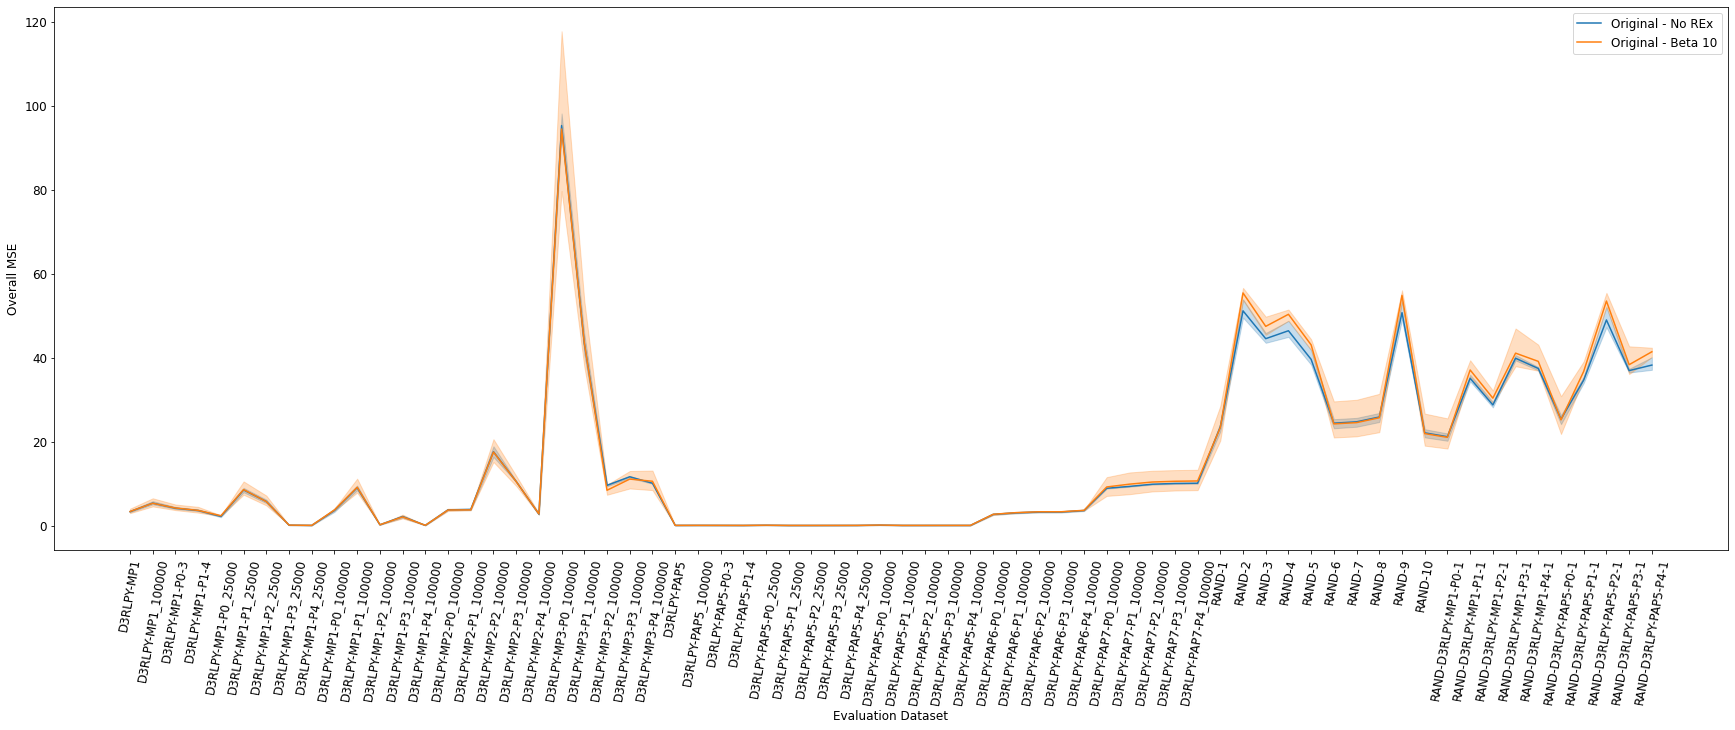

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['Original - No REx', 'Original - Beta 10']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_original_no_rex_avgs_df, scores_original_no_rex_mins_df, scores_original_no_rex_maxs_df),
    (scores_original_avgs_df, scores_original_mins_df, scores_original_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

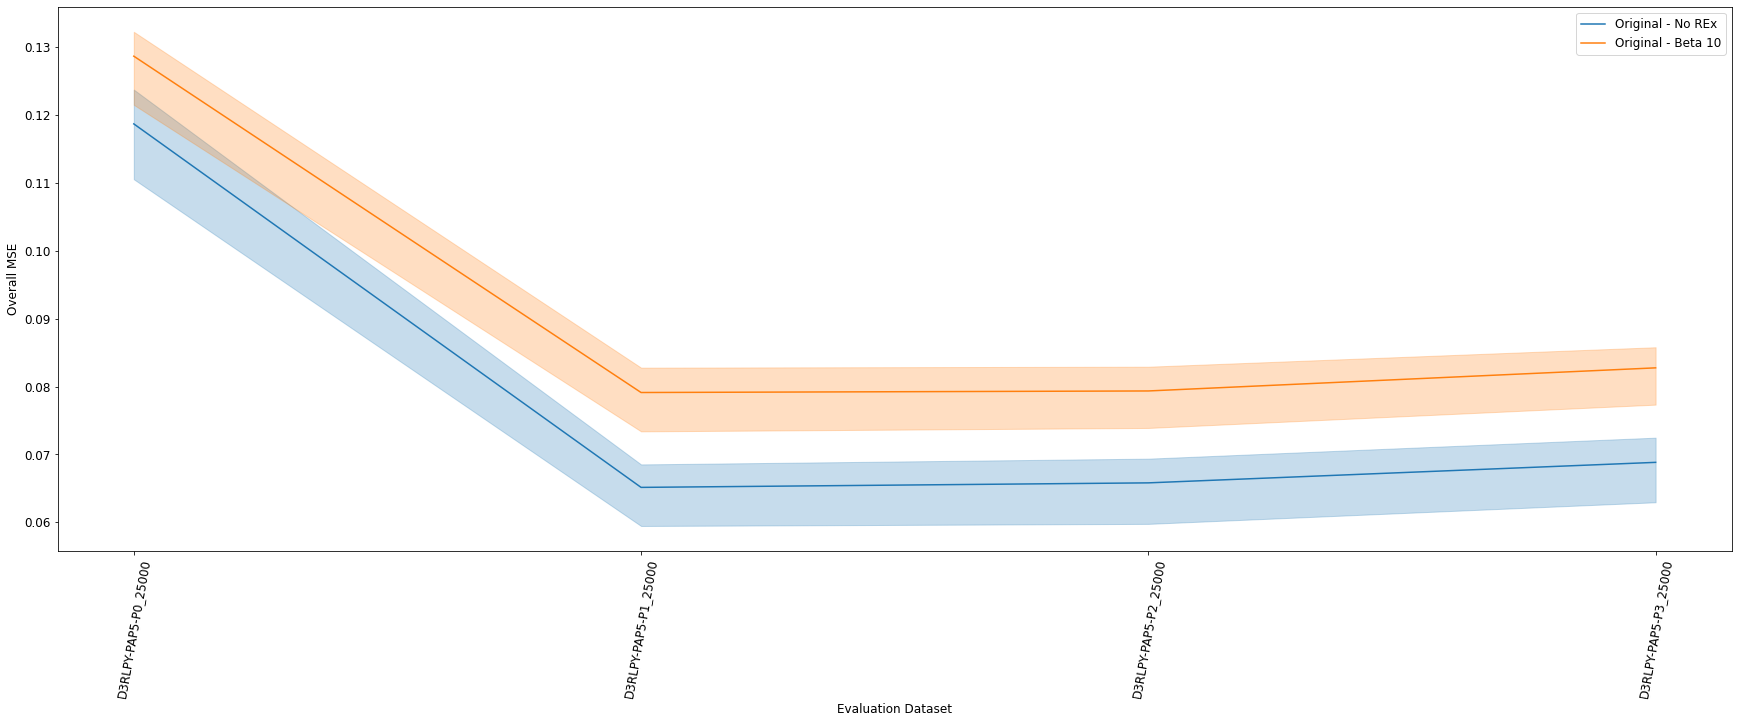

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['Original - No REx', 'Original - Beta 10']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_original_no_rex_avgs_df, scores_original_no_rex_mins_df, scores_original_no_rex_maxs_df),
    (scores_original_avgs_df, scores_original_mins_df, scores_original_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

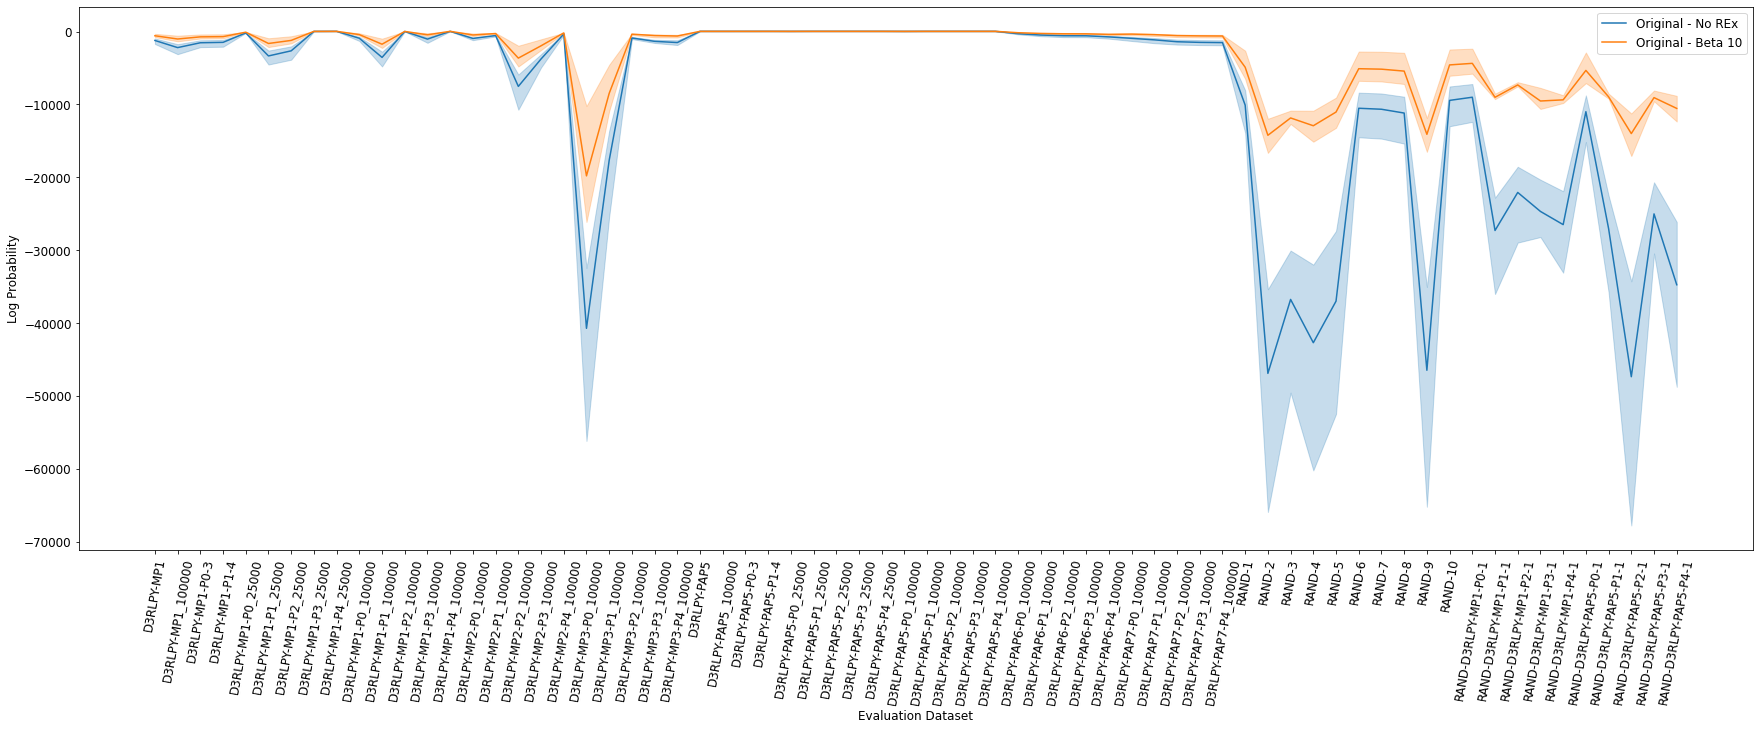

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['Original - No REx', 'Original - Beta 10']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_original_no_rex_avgs_df, scores_original_no_rex_mins_df, scores_original_no_rex_maxs_df),
    (scores_original_avgs_df, scores_original_mins_df, scores_original_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

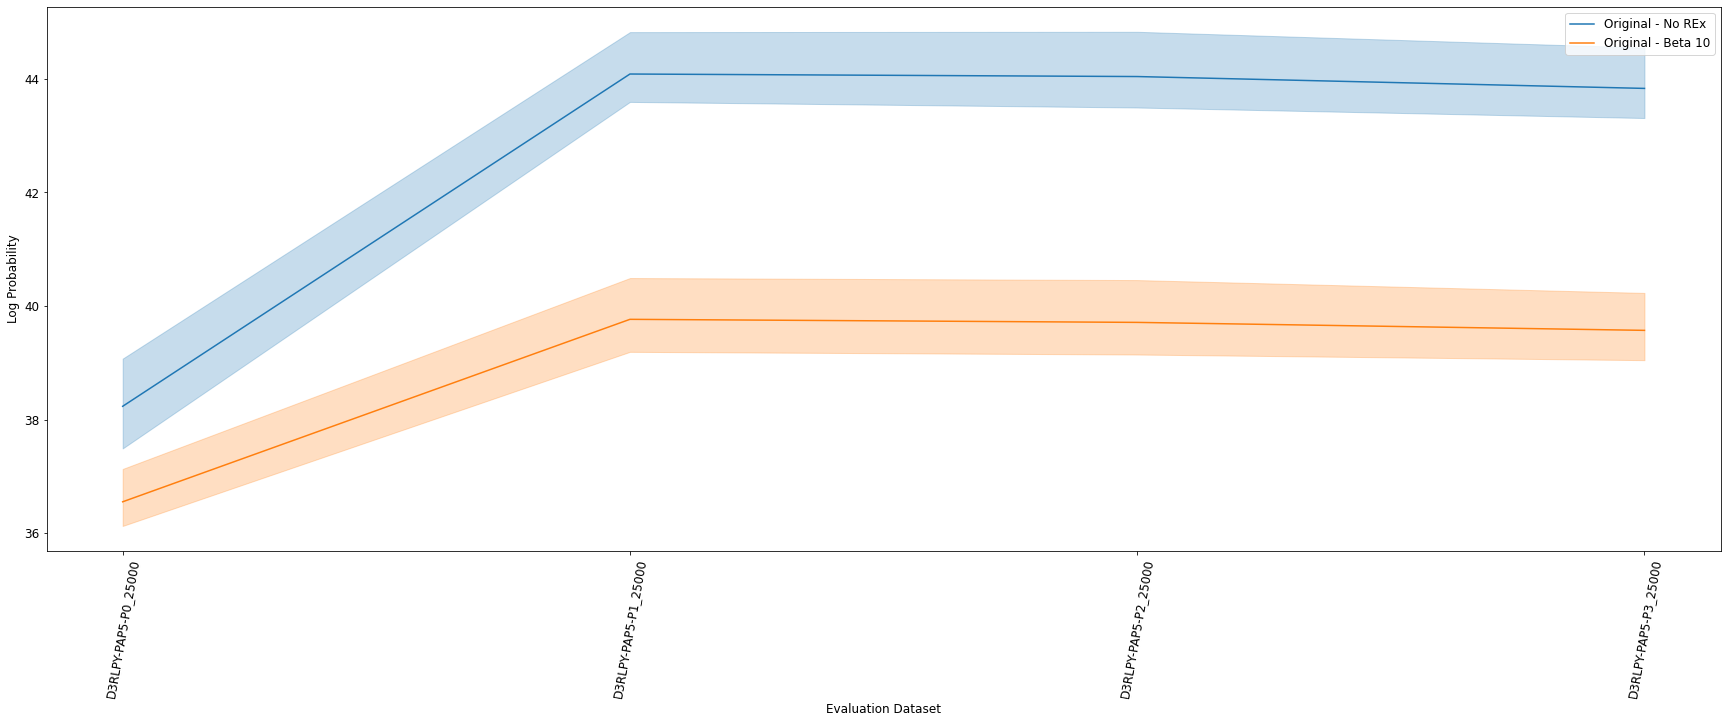

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['Original - No REx', 'Original - Beta 10']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_original_no_rex_avgs_df, scores_original_no_rex_mins_df, scores_original_no_rex_maxs_df),
    (scores_original_avgs_df, scores_original_mins_df, scores_original_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# MSE Core Results

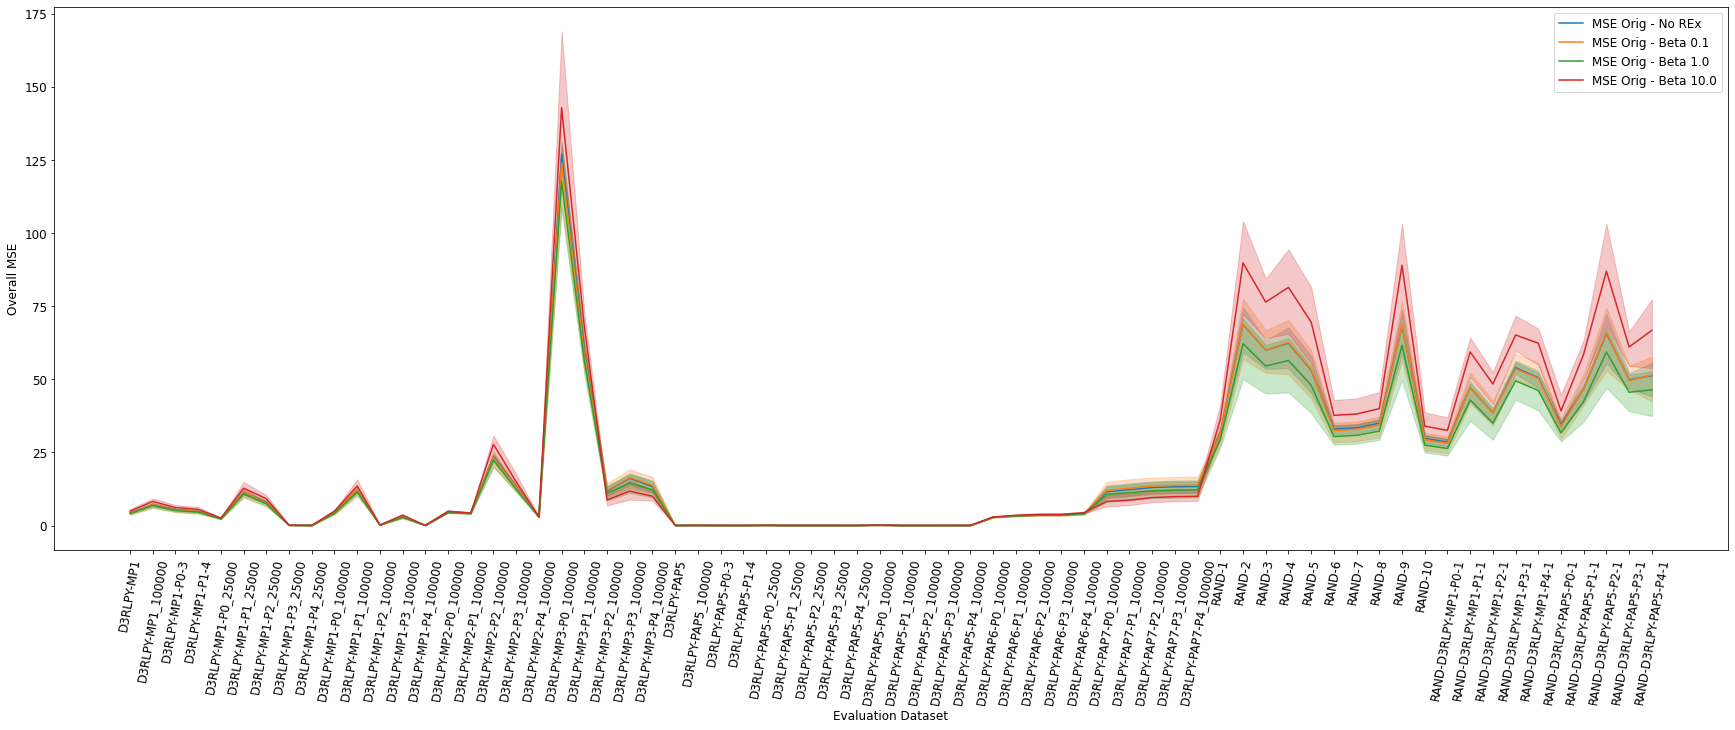

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - No REx', 'MSE Orig - Beta 0.1', 'MSE Orig - Beta 1.0', 'MSE Orig - Beta 10.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df),
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df),
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

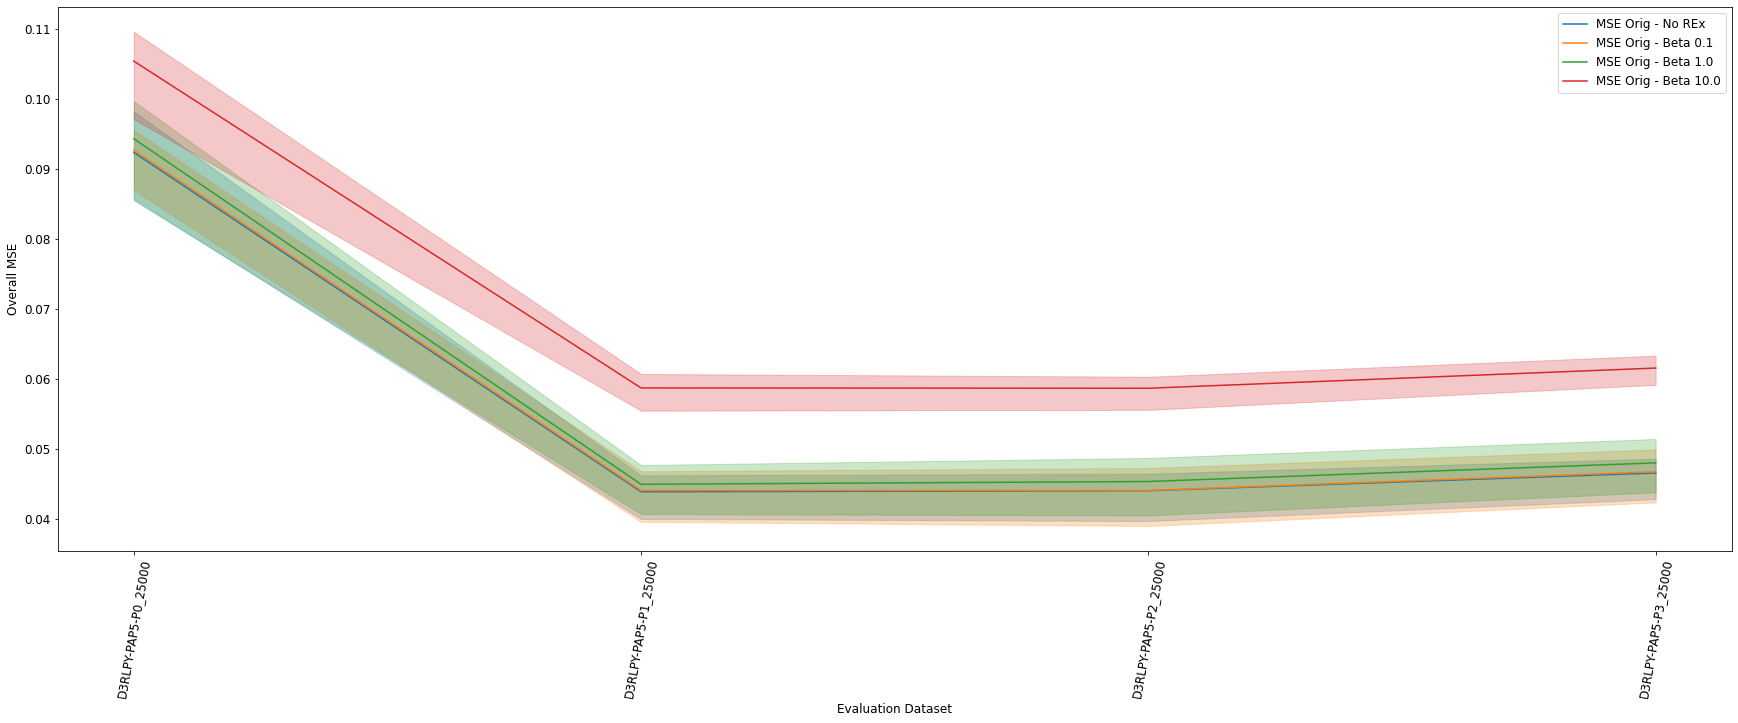

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - No REx', 'MSE Orig - Beta 0.1', 'MSE Orig - Beta 1.0', 'MSE Orig - Beta 10.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df),
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df),
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

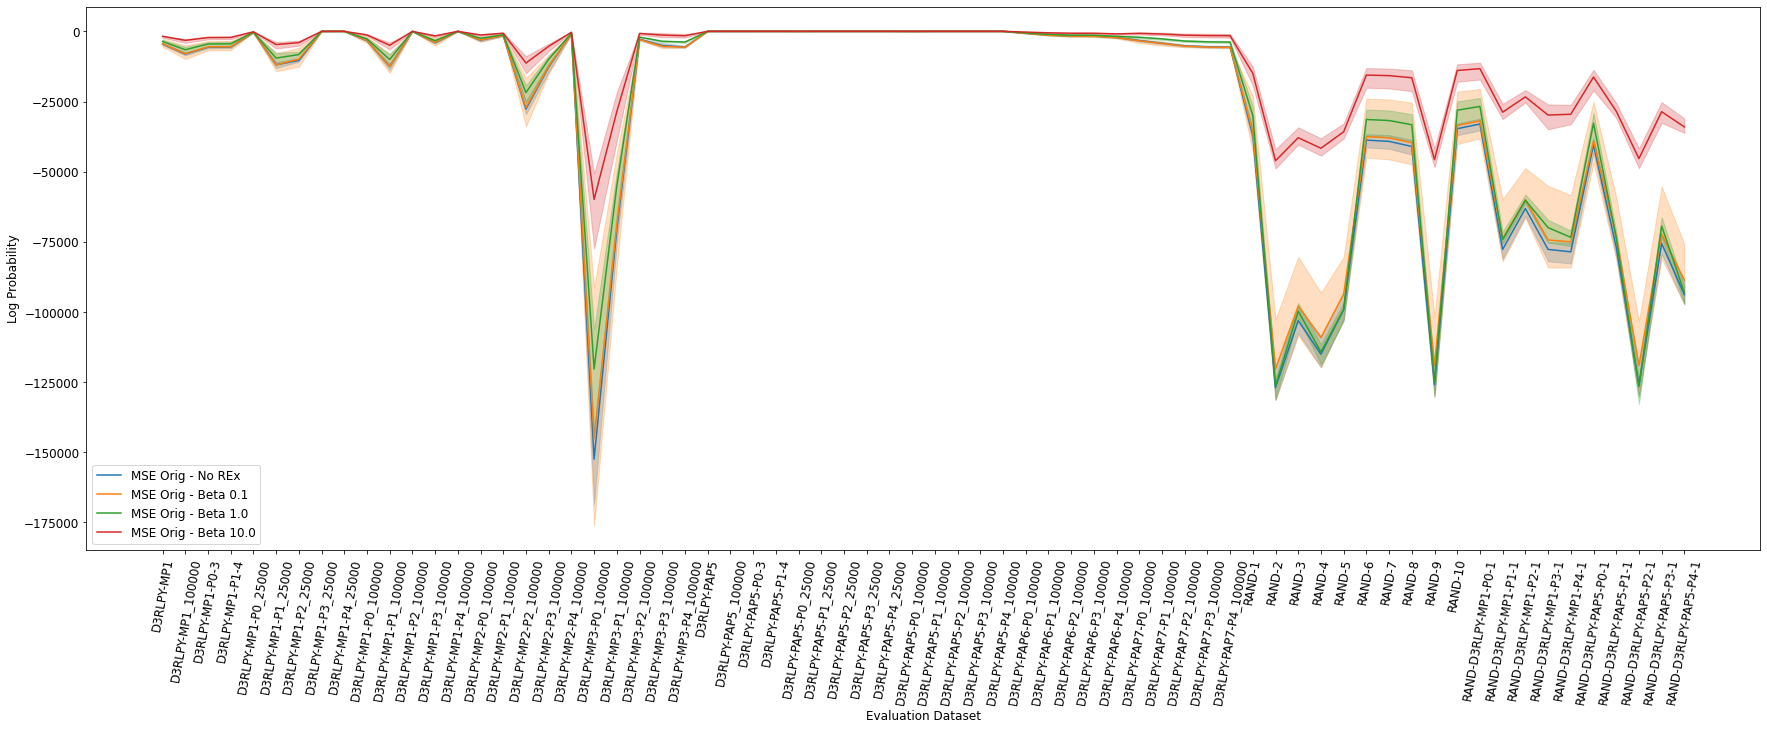

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - No REx', 'MSE Orig - Beta 0.1', 'MSE Orig - Beta 1.0', 'MSE Orig - Beta 10.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df),
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df),
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

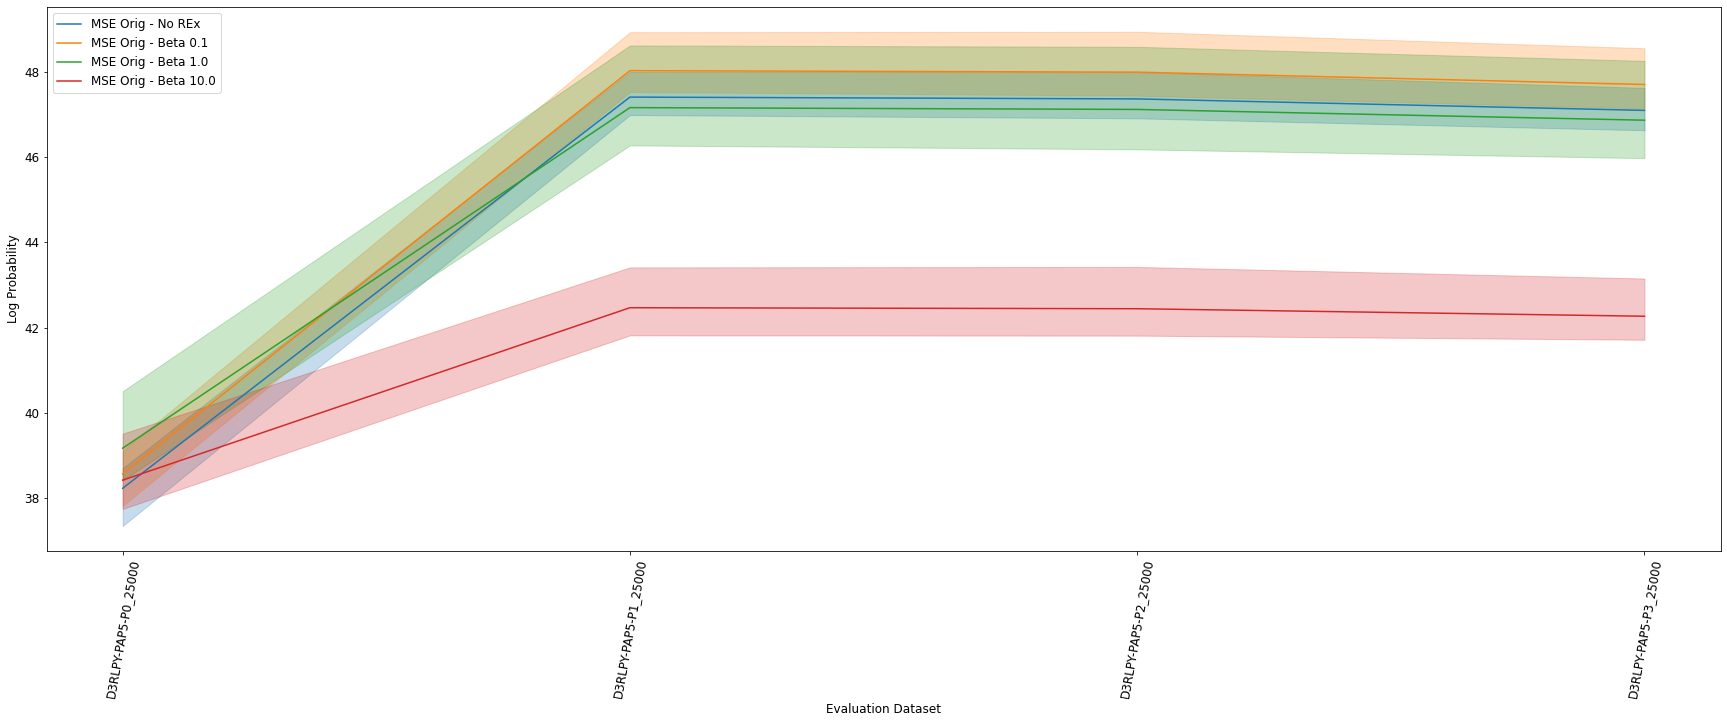

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - No REx', 'MSE Orig - Beta 0.1', 'MSE Orig - Beta 1.0', 'MSE Orig - Beta 10.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df),
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df),
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# MSE Total Results

## Learning Rate Comparison - No REx

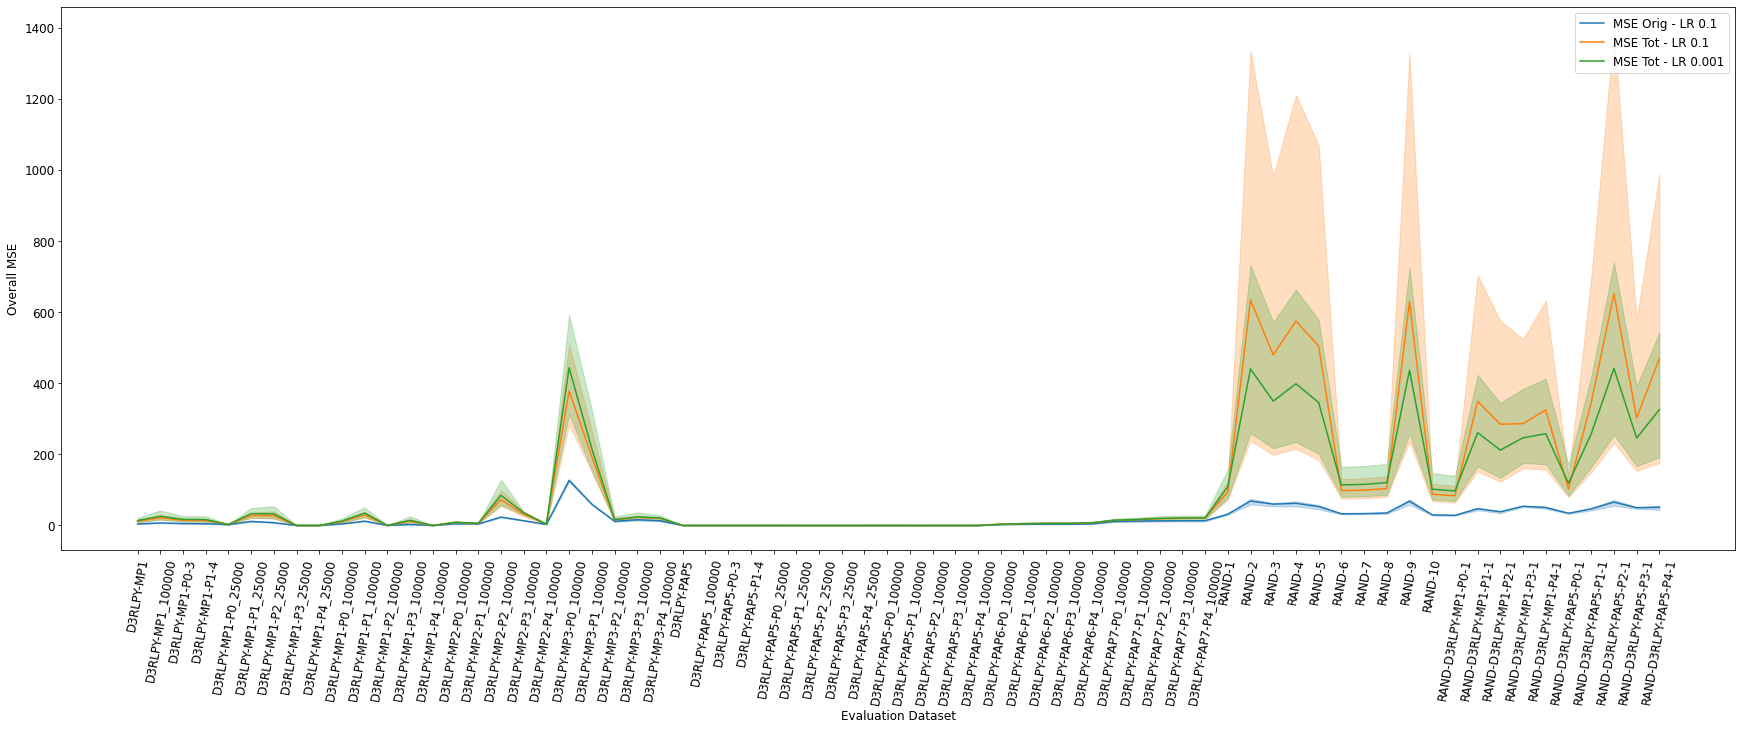

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - LR 0.1', 'MSE Tot - LR 0.1', 'MSE Tot - LR 0.001']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

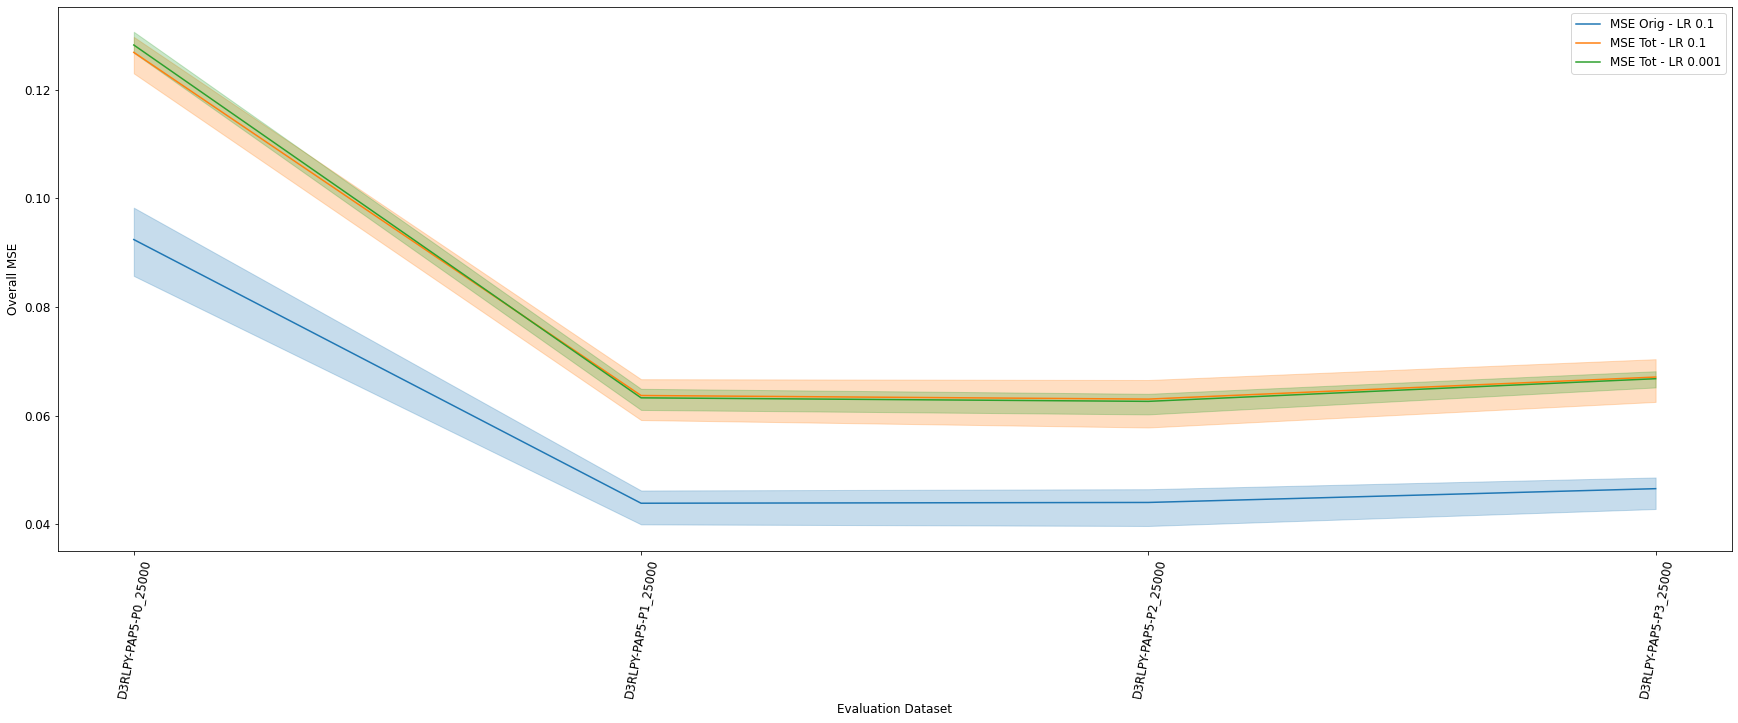

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - LR 0.1', 'MSE Tot - LR 0.1', 'MSE Tot - LR 0.001']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

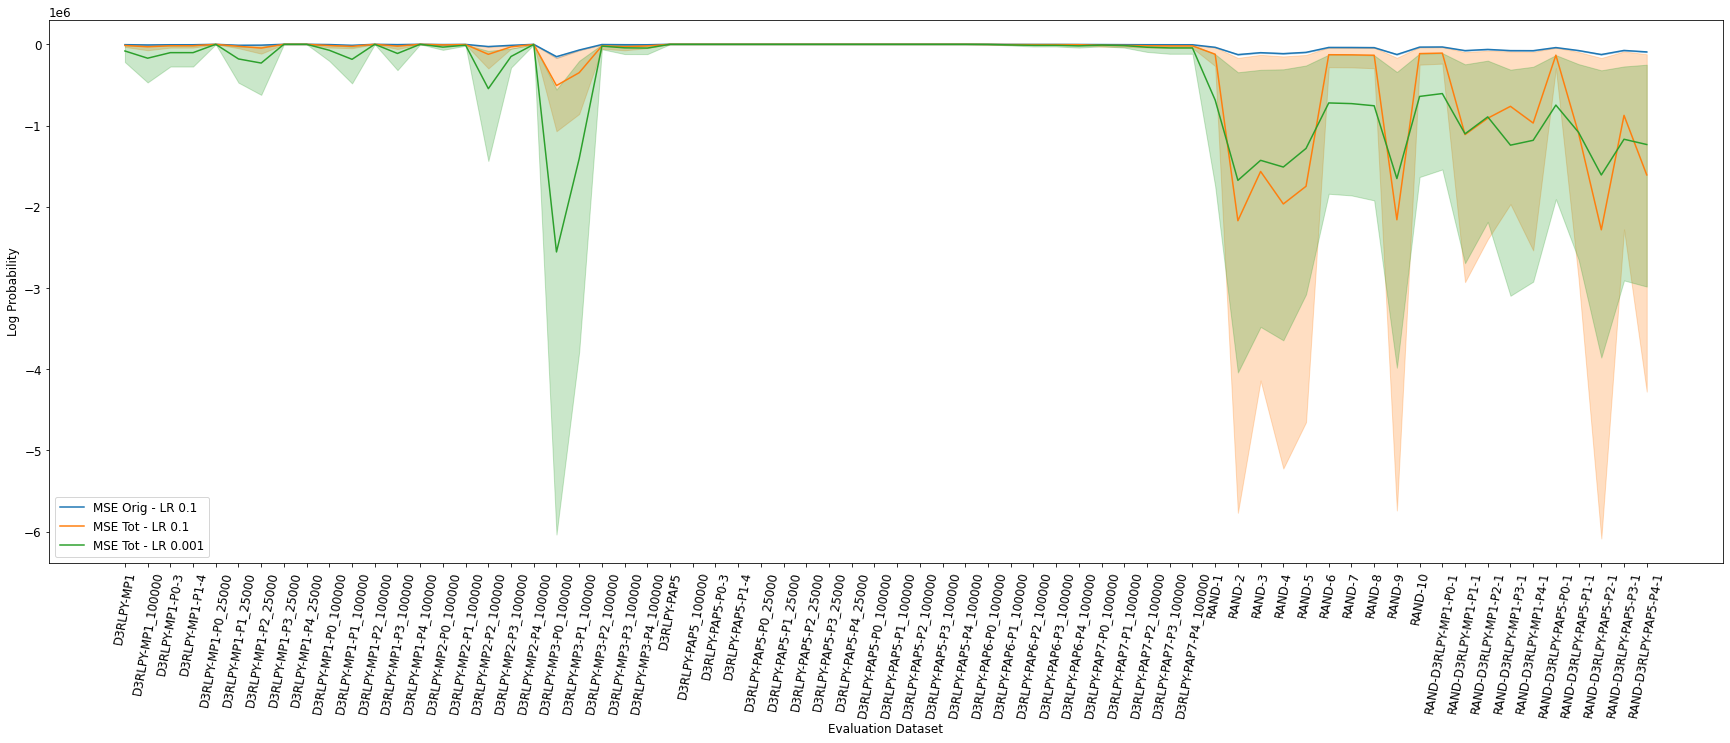

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - LR 0.1', 'MSE Tot - LR 0.1', 'MSE Tot - LR 0.001']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

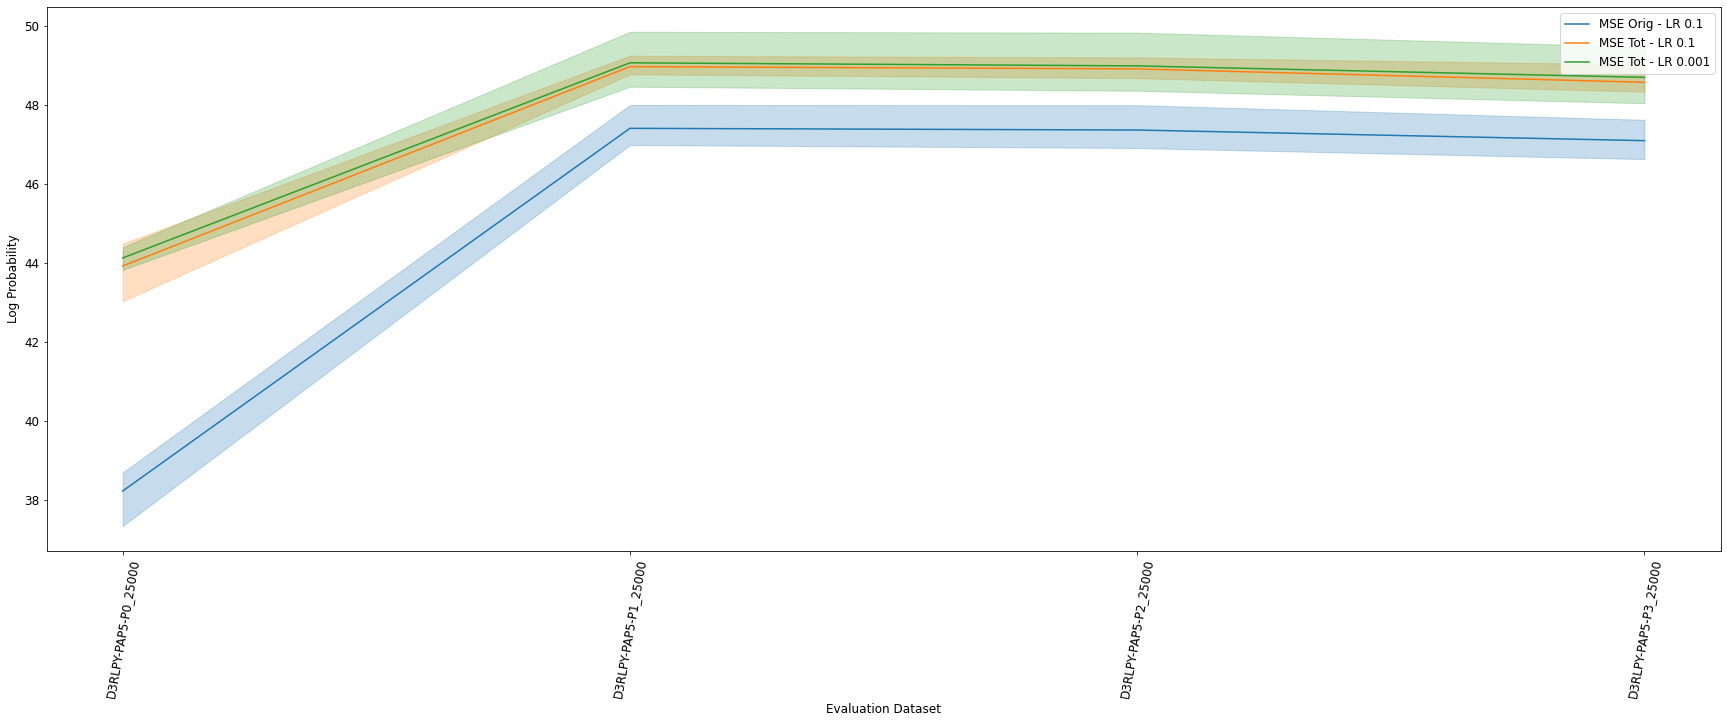

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Orig - LR 0.1', 'MSE Tot - LR 0.1', 'MSE Tot - LR 0.001']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_no_rex_avgs_df, scores_mse_no_rex_mins_df, scores_mse_no_rex_maxs_df),
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

## Learning Rate Comparison

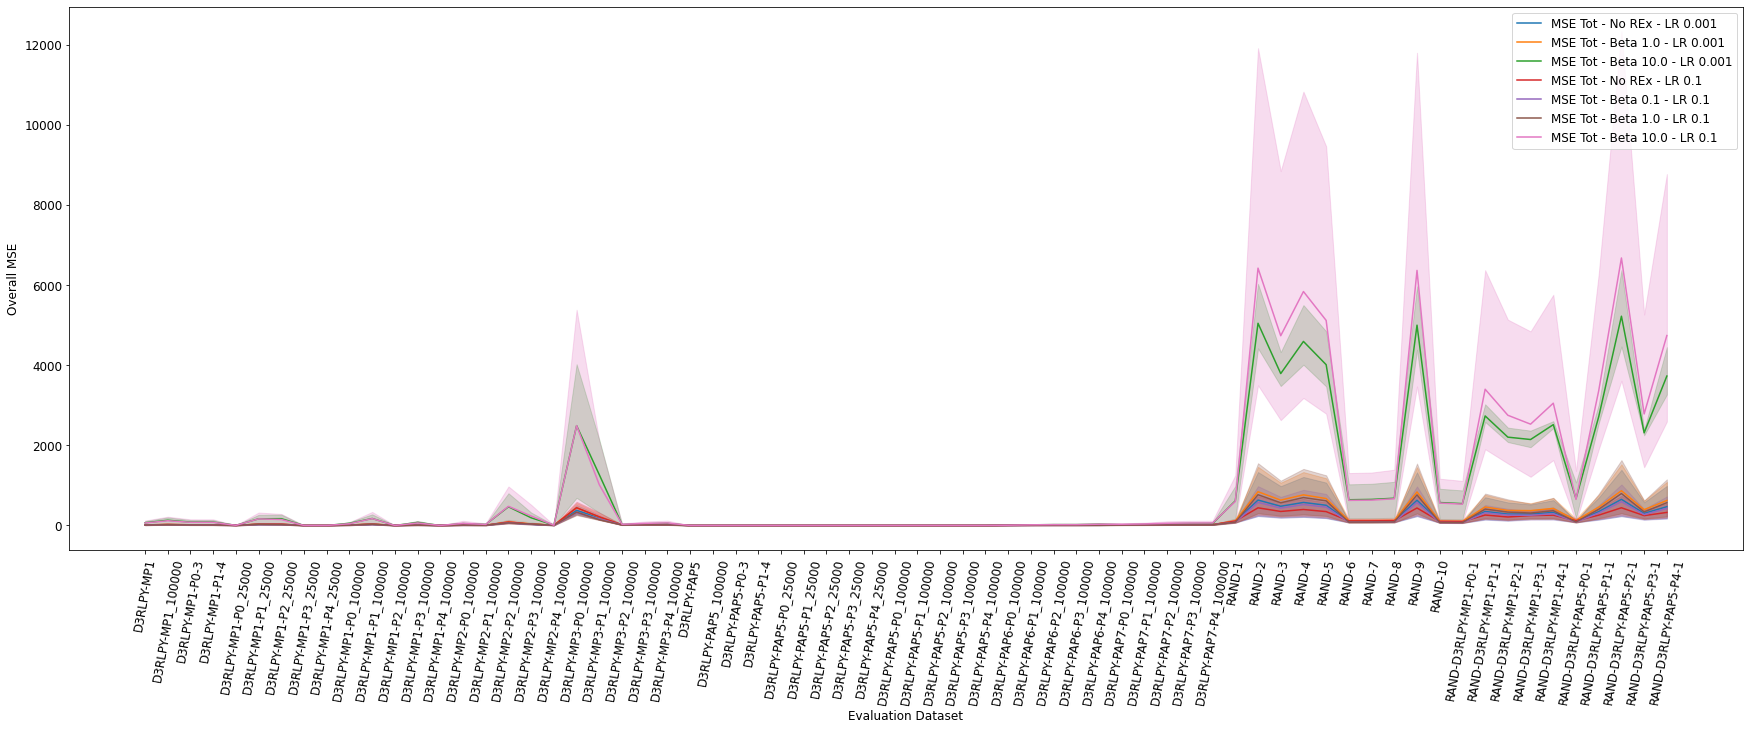

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - Beta 10.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1', 'MSE Tot - Beta 10.0 - LR 0.1']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

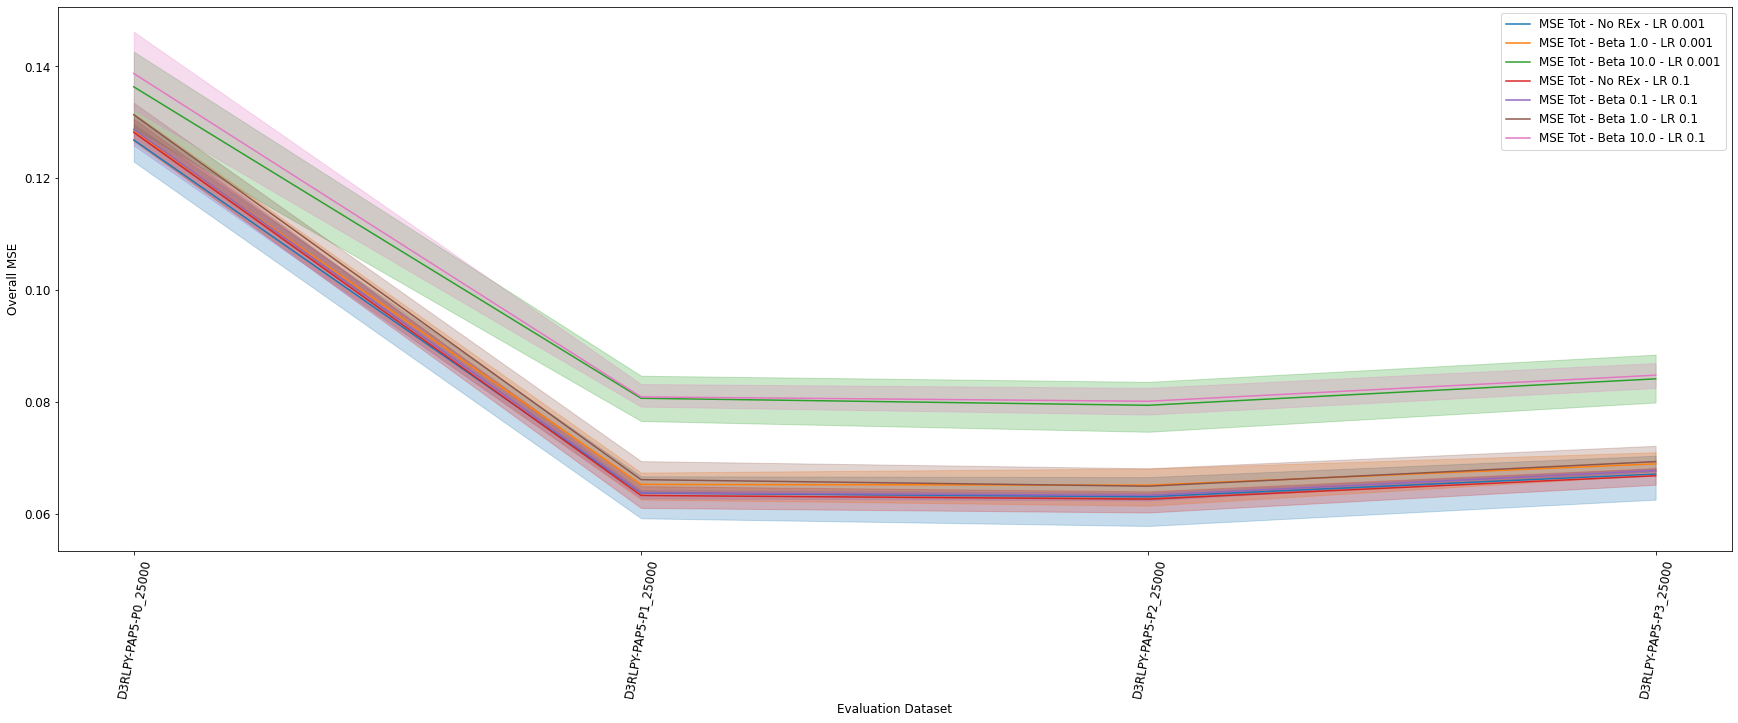

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - Beta 10.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1', 'MSE Tot - Beta 10.0 - LR 0.1']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

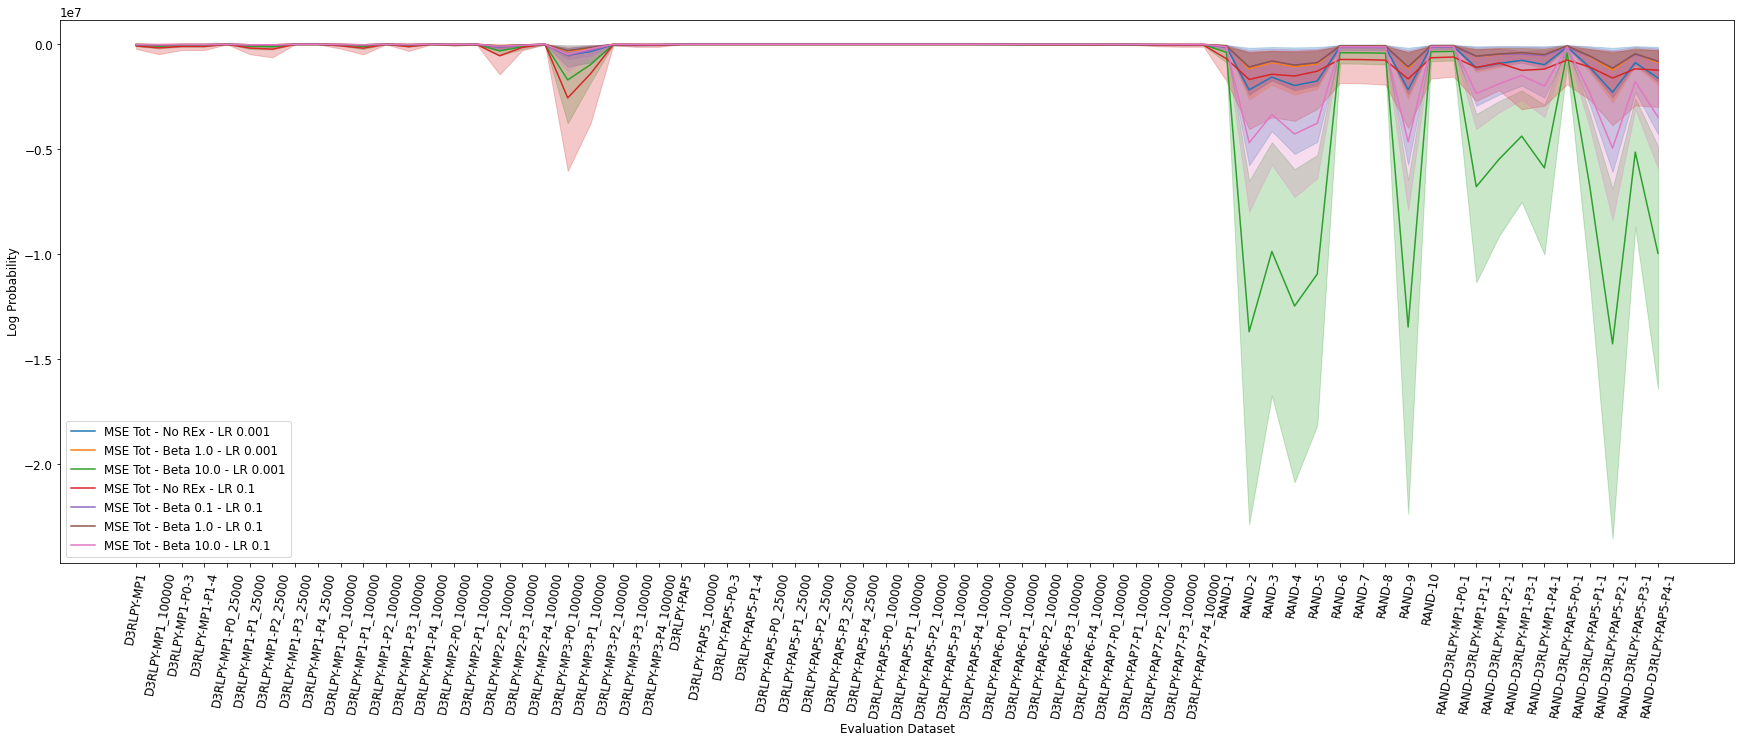

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - Beta 10.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1', 'MSE Tot - Beta 10.0 - LR 0.1']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

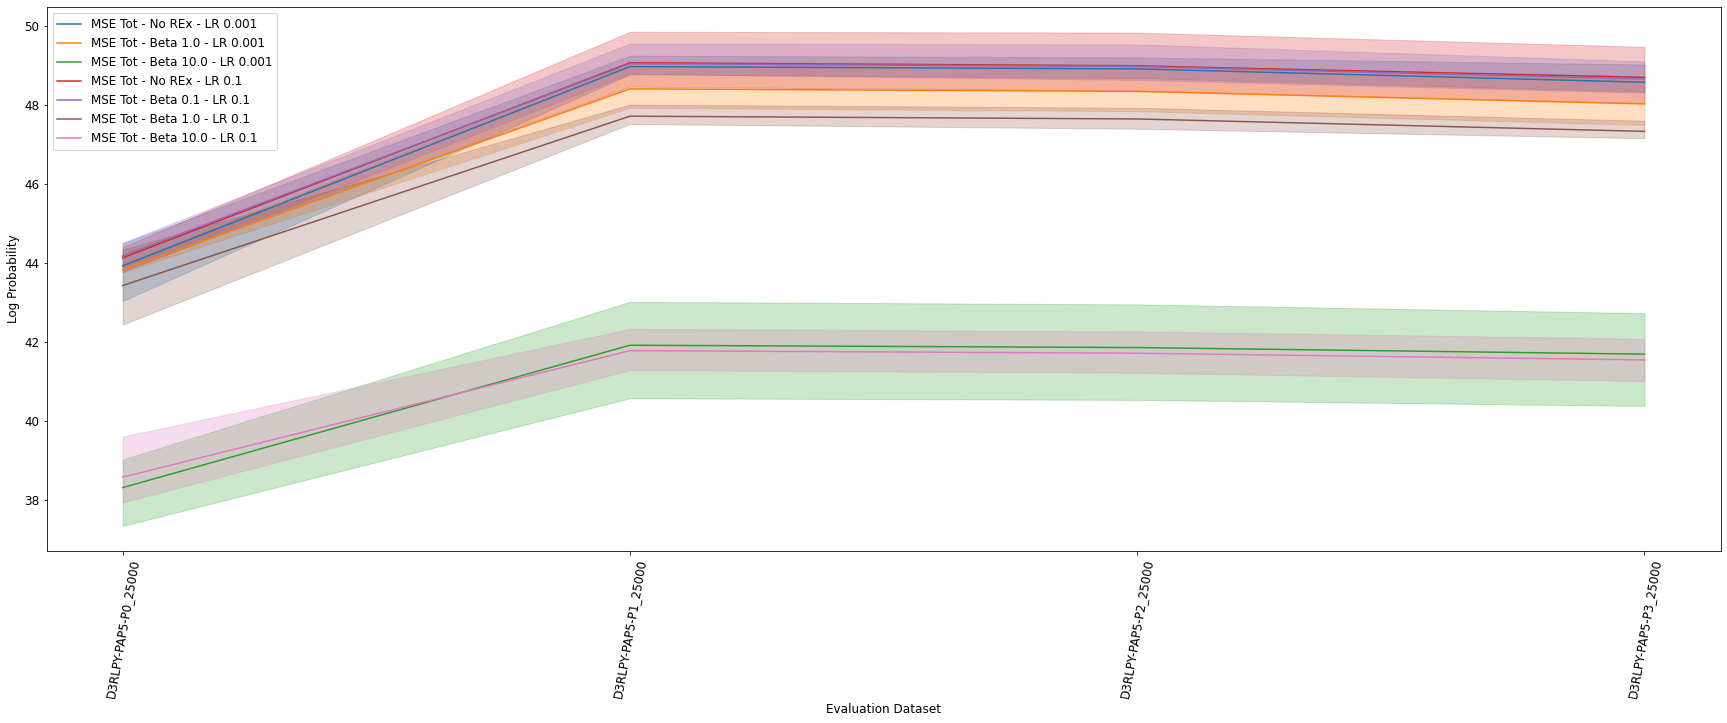

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - Beta 10.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1', 'MSE Tot - Beta 10.0 - LR 0.1']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

Exclude Beta = 10 results for both LRs

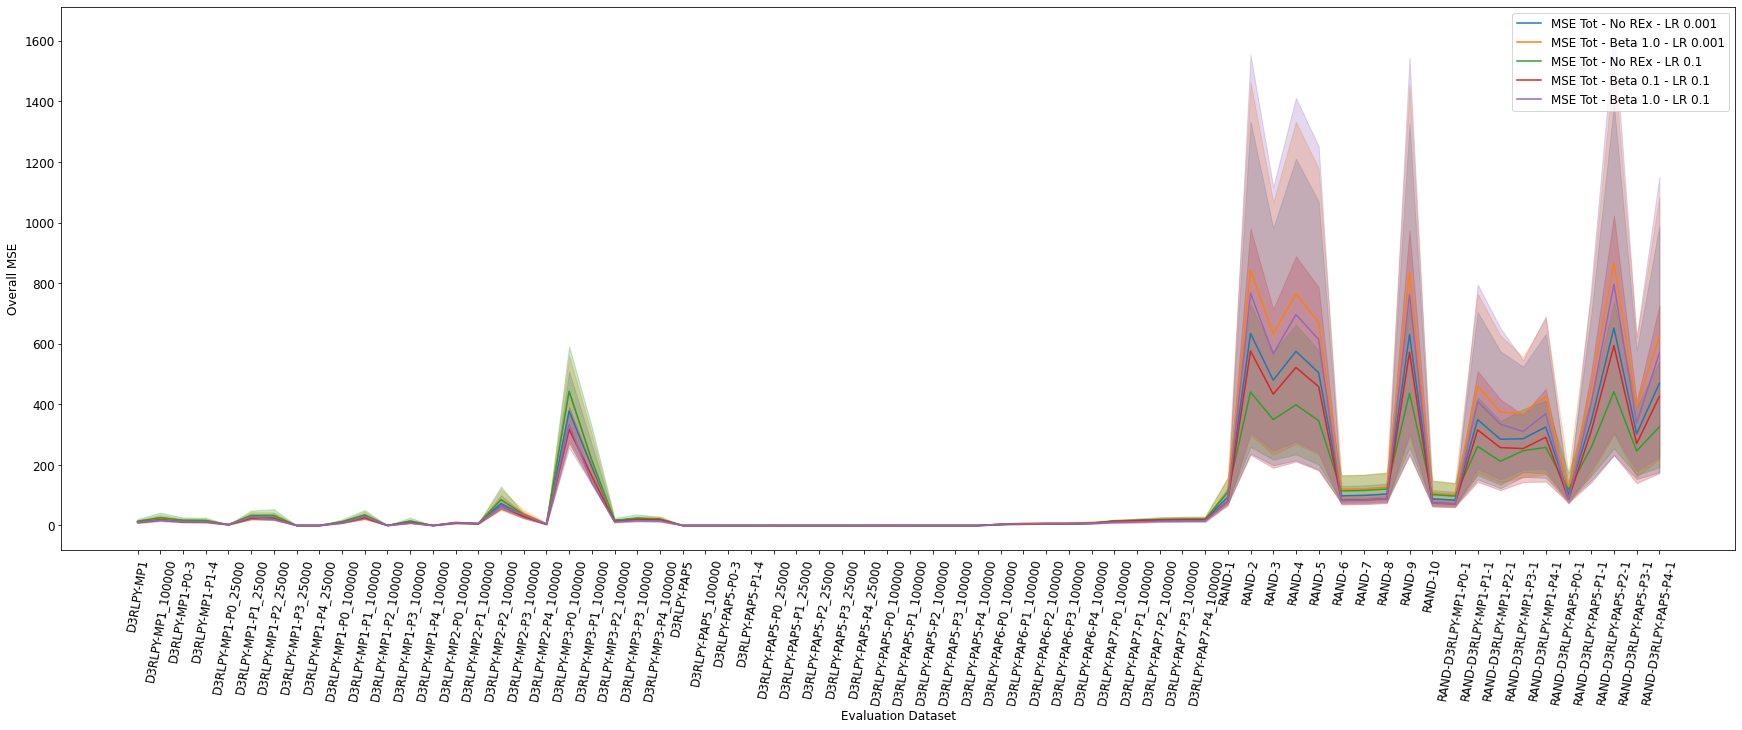

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    # (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    # (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

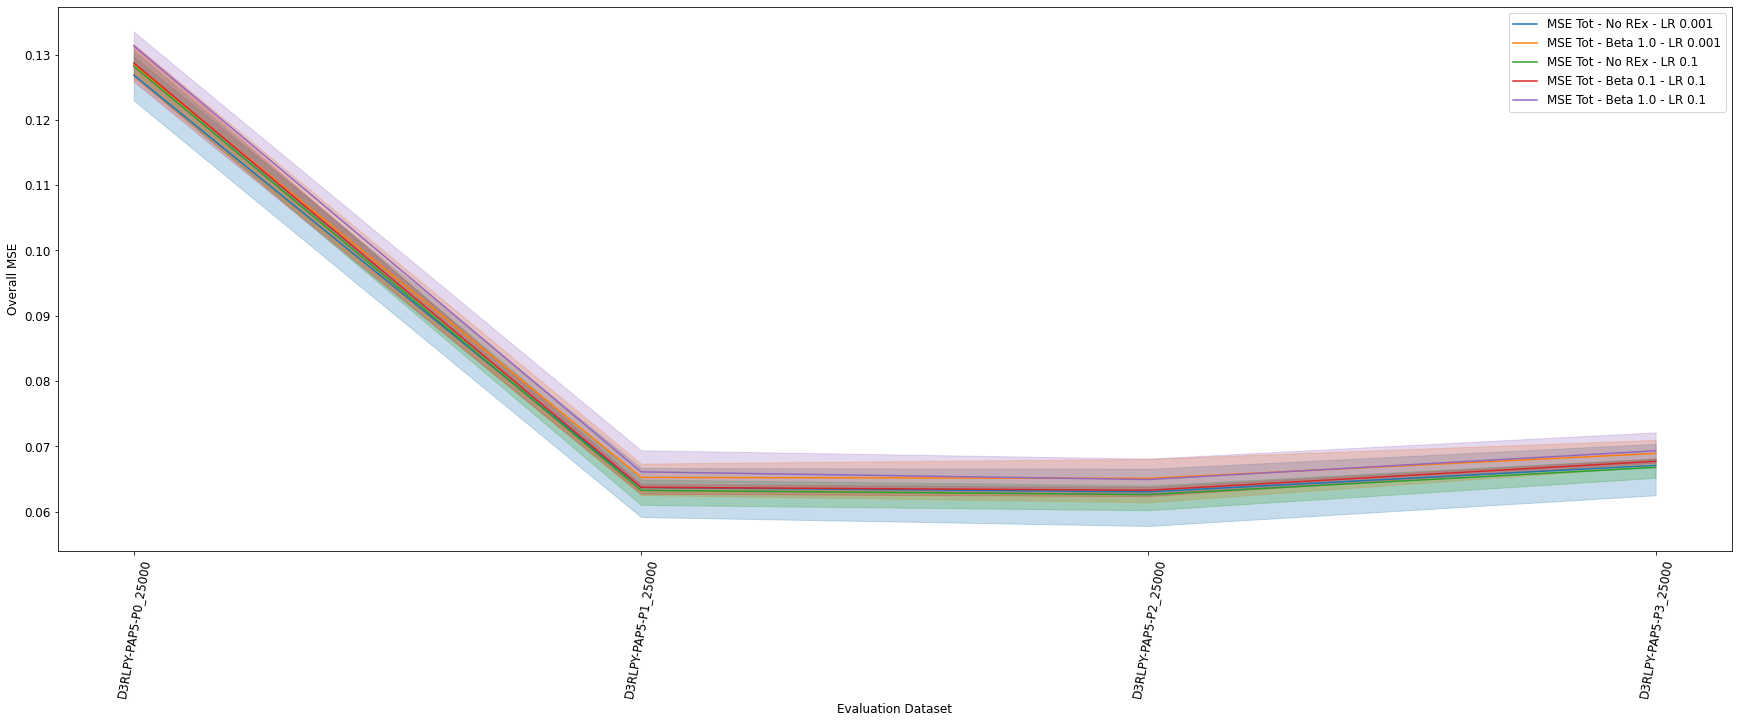

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    # (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    # (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

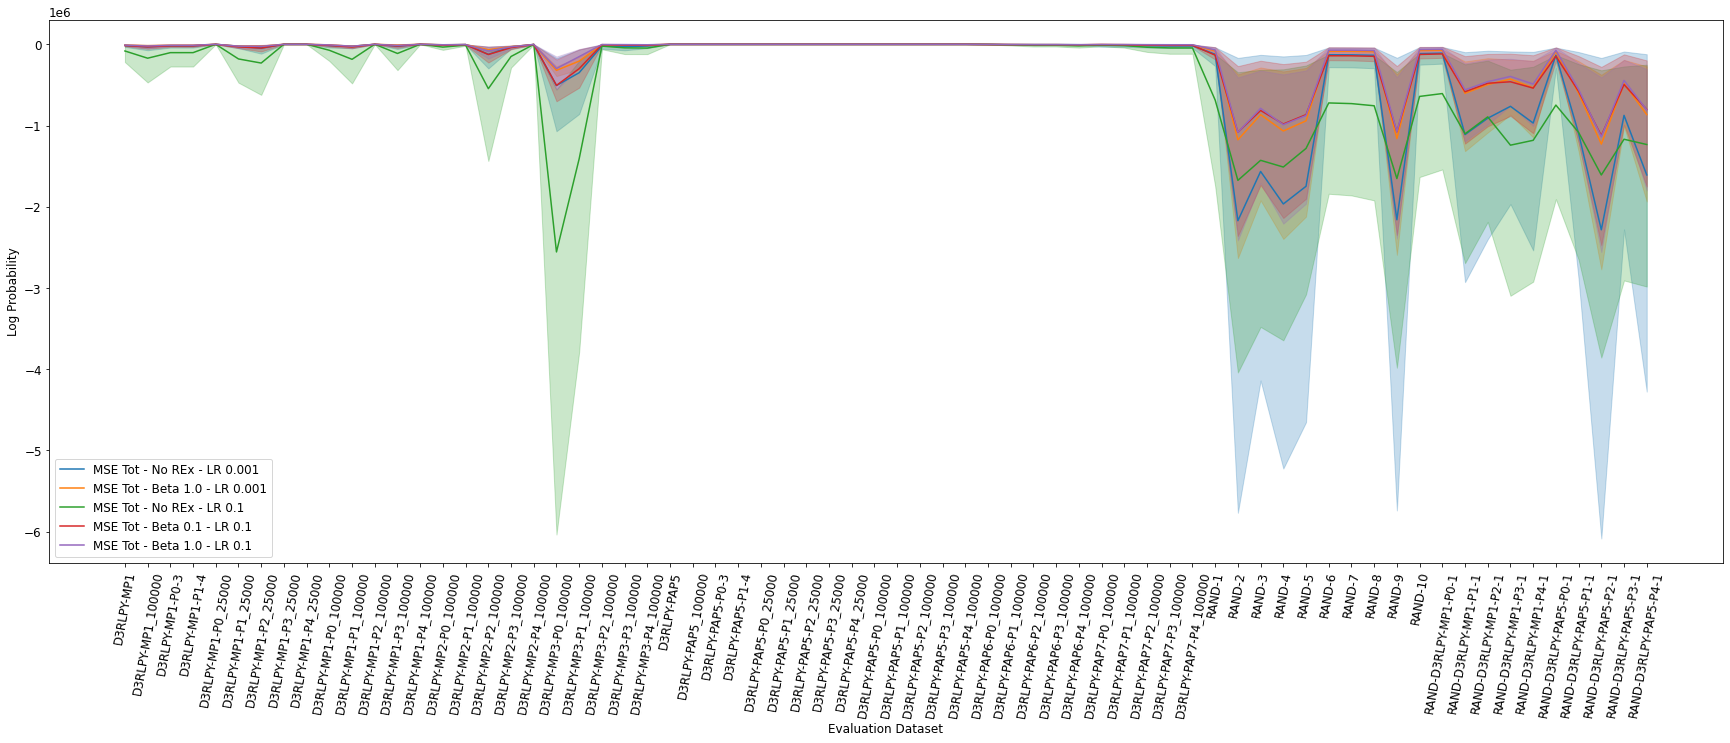

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    # (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    # (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

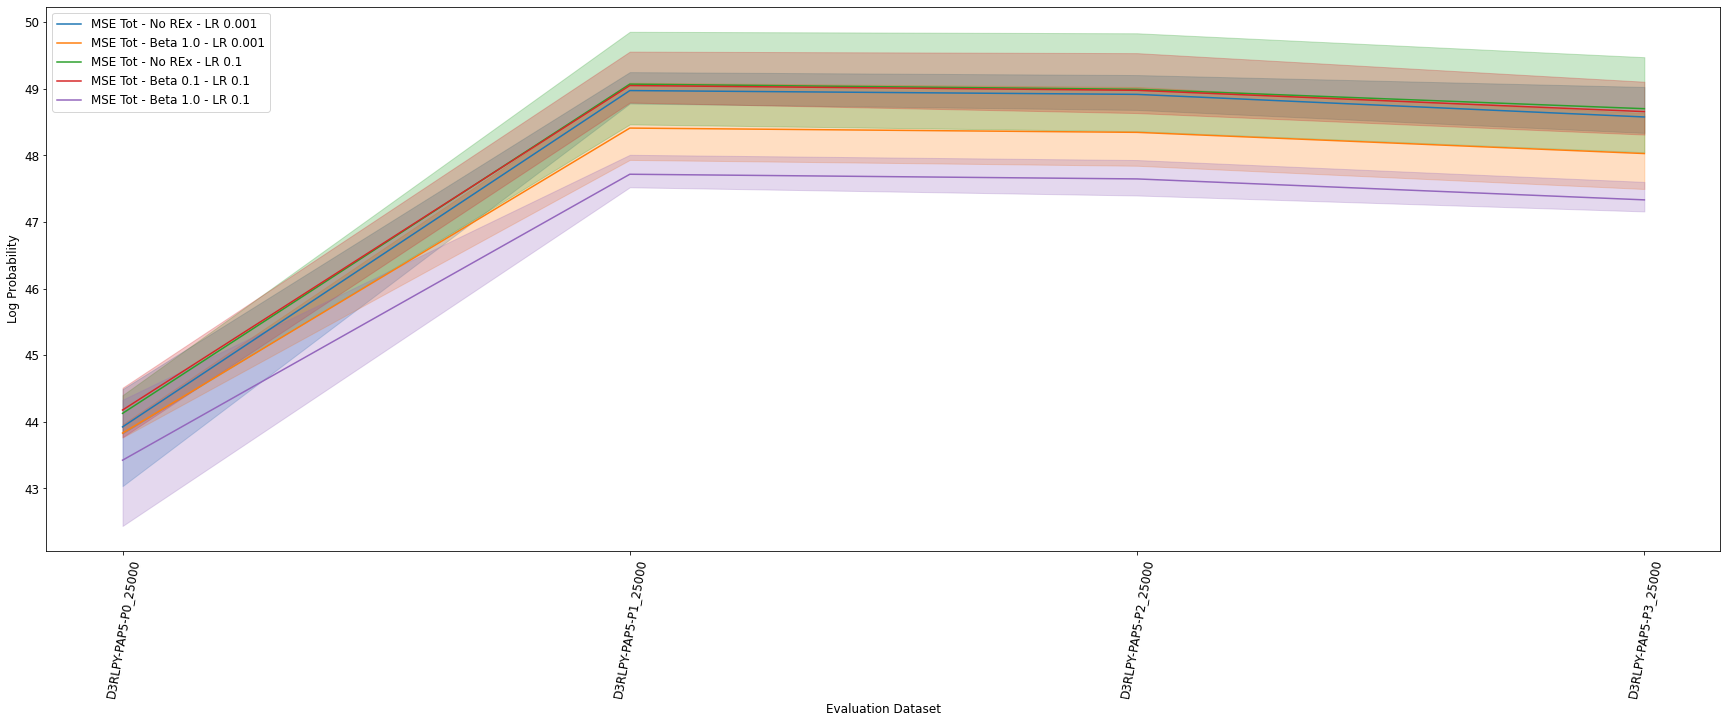

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    # (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    # (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# LR 0.001

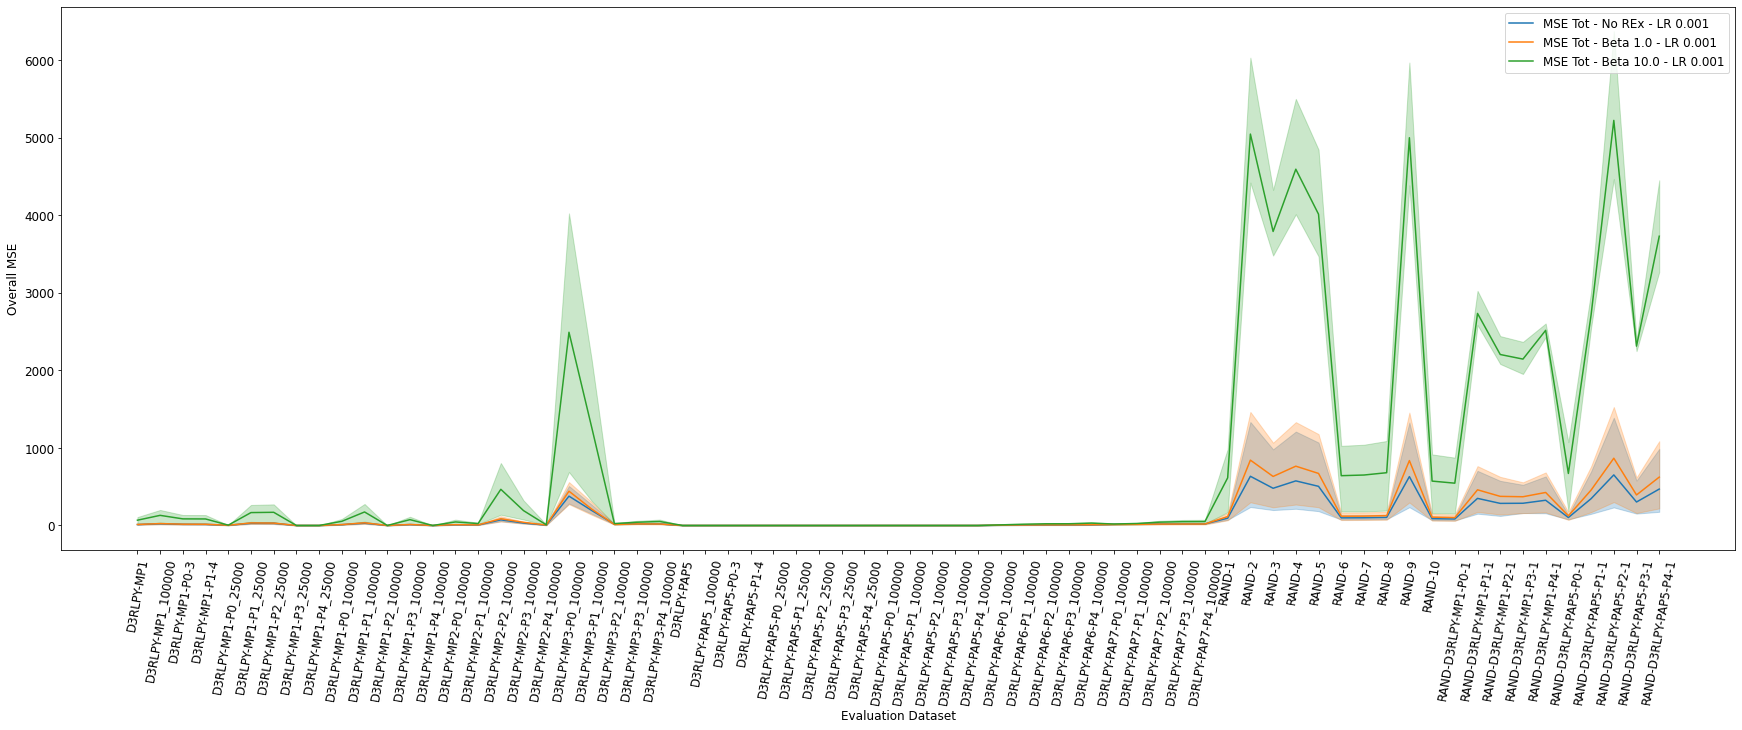

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - Beta 10.0 - LR 0.001']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

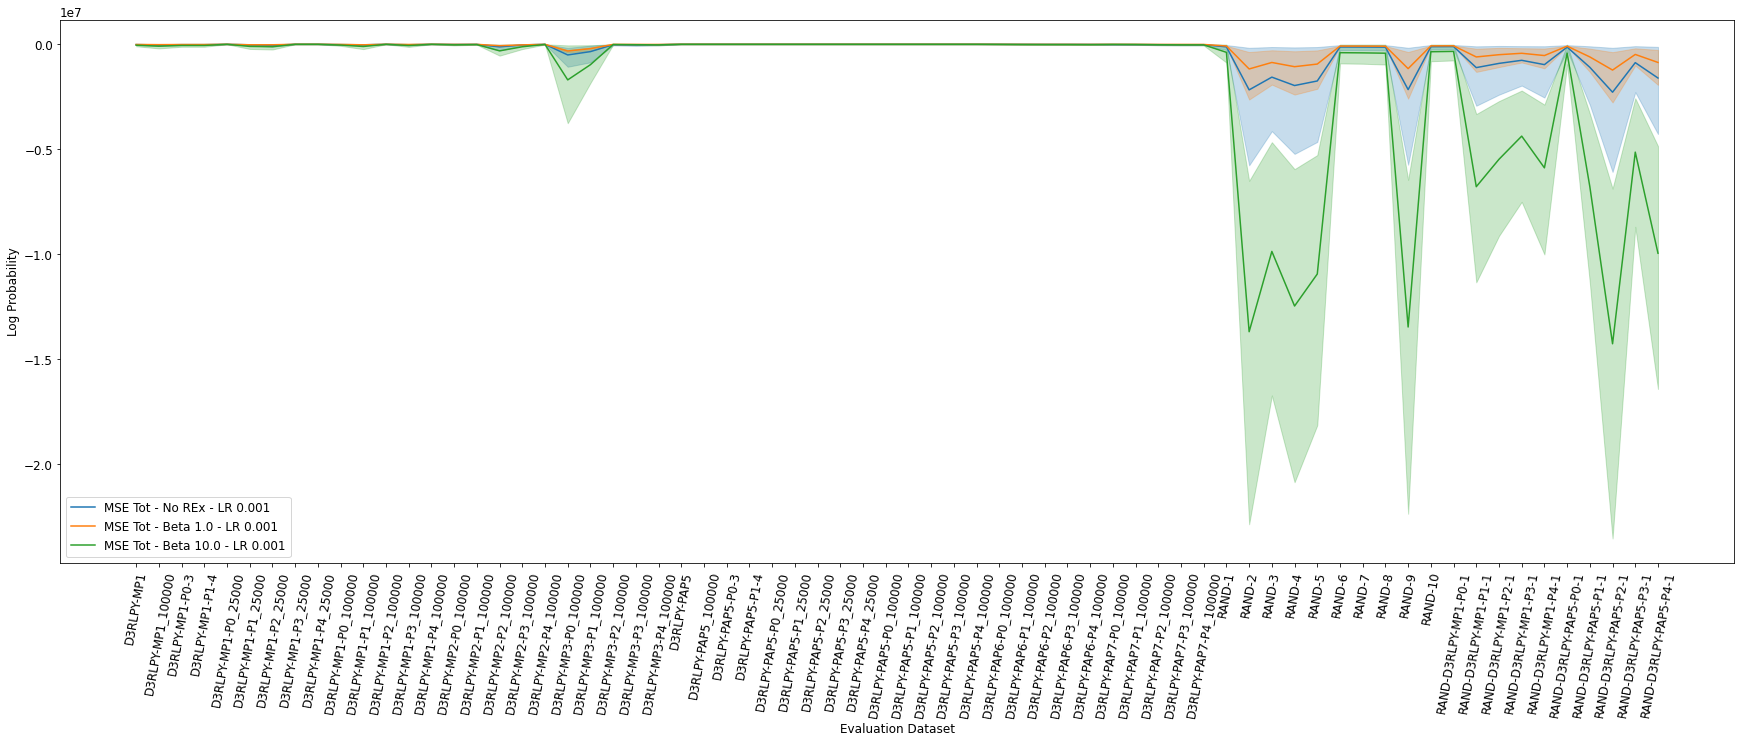

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.001', 'MSE Tot - Beta 1.0 - LR 0.001', 'MSE Tot - Beta 10.0 - LR 0.001']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_001_no_rex_avgs_df, scores_mse_tot_001_no_rex_mins_df, scores_mse_tot_001_no_rex_maxs_df),
    (scores_mse_tot_001_1_avgs_df, scores_mse_tot_001_1_mins_df, scores_mse_tot_001_1_maxs_df),
    (scores_mse_tot_001_10_avgs_df, scores_mse_tot_001_10_mins_df, scores_mse_tot_001_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# LR 0.1

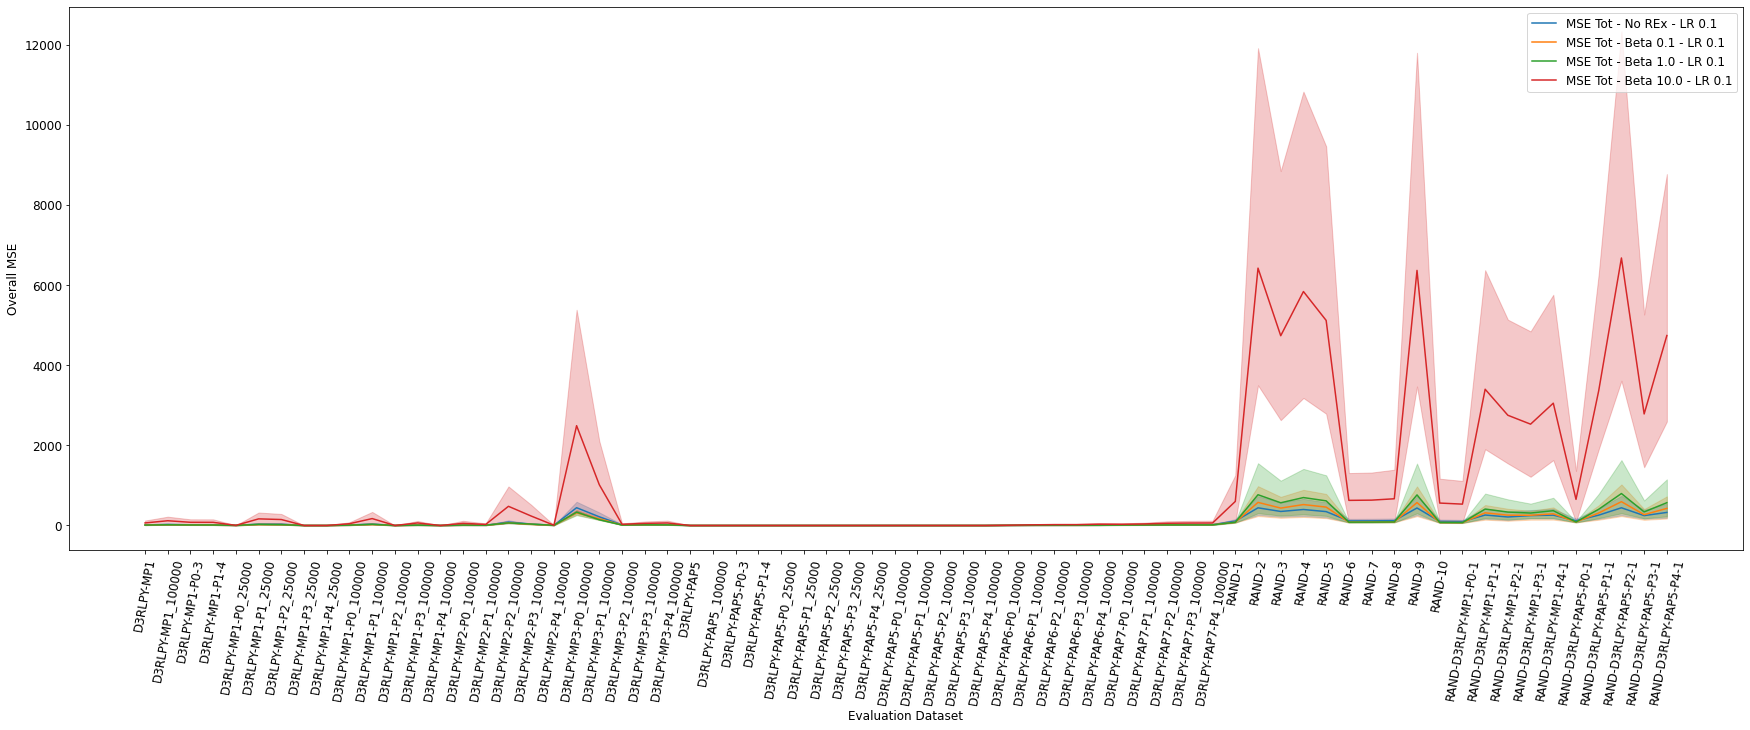

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1', 'MSE Tot - Beta 10.0 - LR 0.1']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

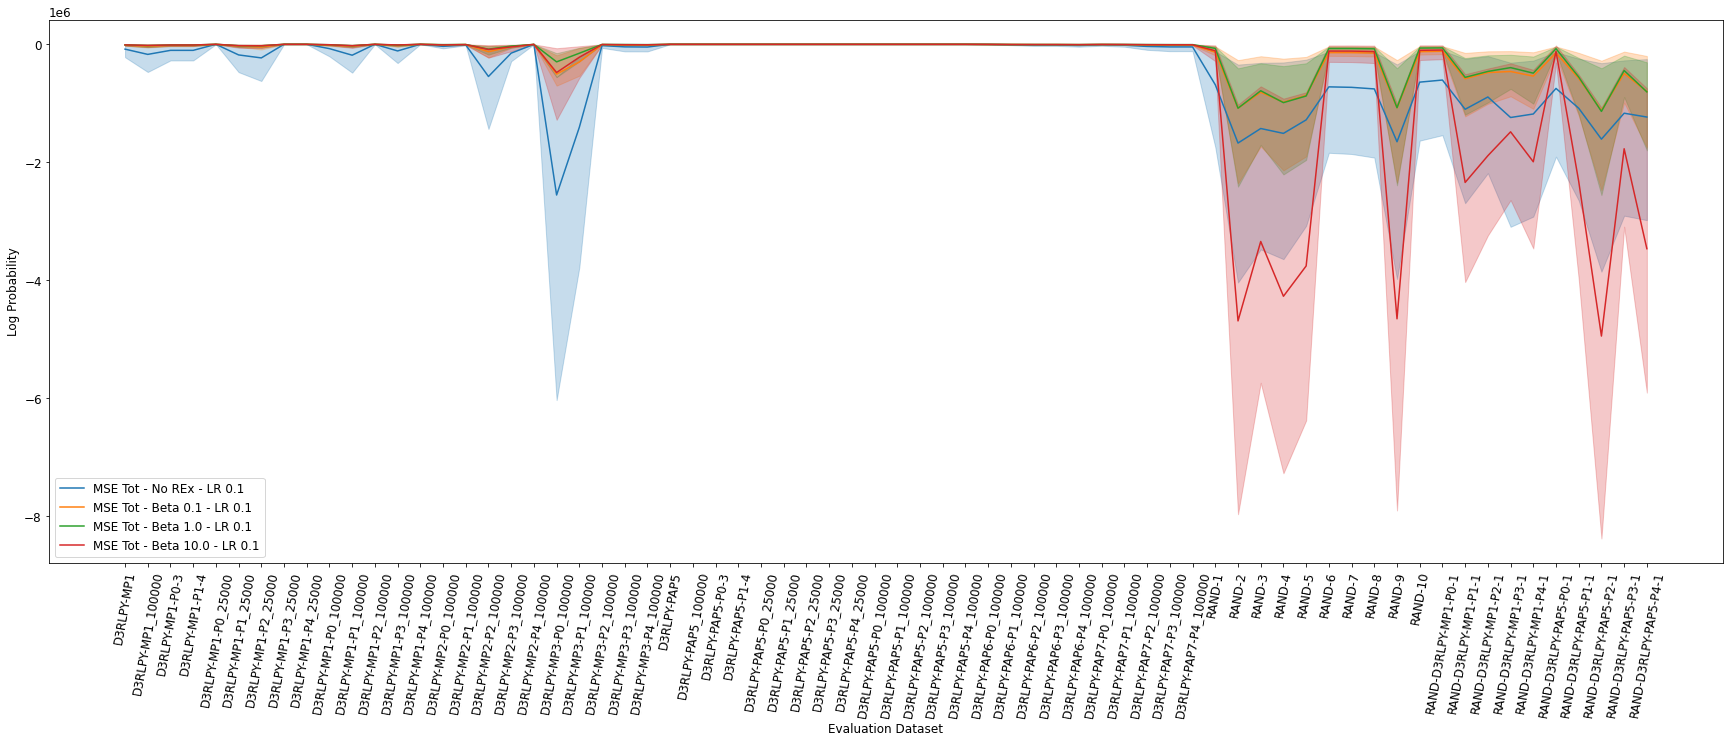

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['MSE Tot - No REx - LR 0.1', 'MSE Tot - Beta 0.1 - LR 0.1', 'MSE Tot - Beta 1.0 - LR 0.1', 'MSE Tot - Beta 10.0 - LR 0.1']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_mse_tot_01_no_rex_avgs_df, scores_mse_tot_01_no_rex_mins_df, scores_mse_tot_01_no_rex_maxs_df),
    (scores_mse_tot_01_01_avgs_df, scores_mse_tot_01_01_mins_df, scores_mse_tot_01_01_maxs_df),
    (scores_mse_tot_01_1_avgs_df, scores_mse_tot_01_1_mins_df, scores_mse_tot_01_1_maxs_df),
    (scores_mse_tot_01_10_avgs_df, scores_mse_tot_01_10_mins_df, scores_mse_tot_01_10_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# LL Results

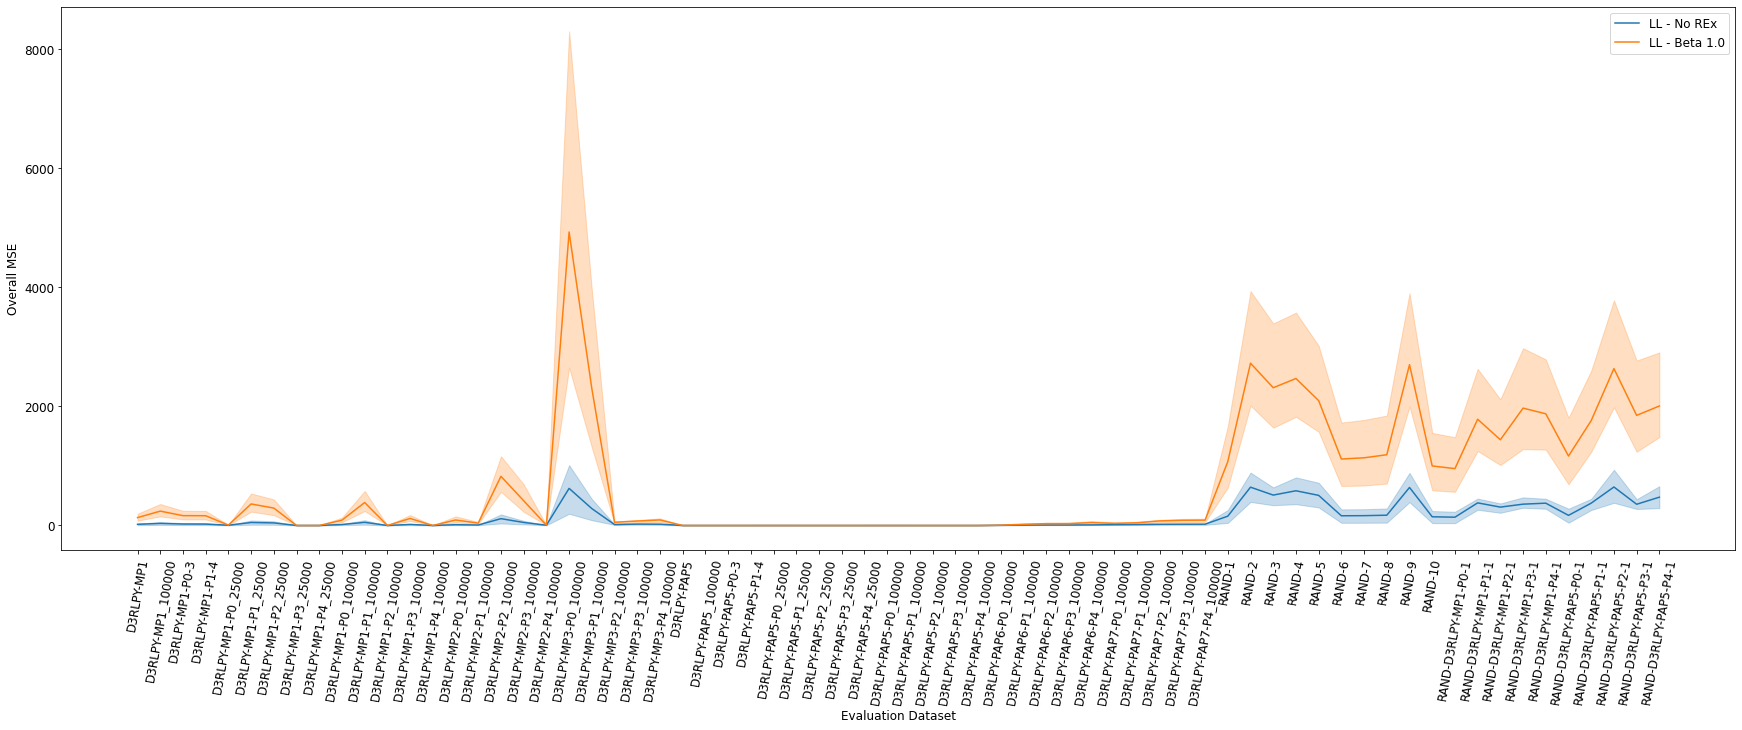

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['LL - No REx', 'LL - Beta 1.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_ll_no_rex_avgs_df, scores_ll_no_rex_mins_df, scores_ll_no_rex_maxs_df),
    (scores_ll_avgs_df, scores_ll_mins_df, scores_ll_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

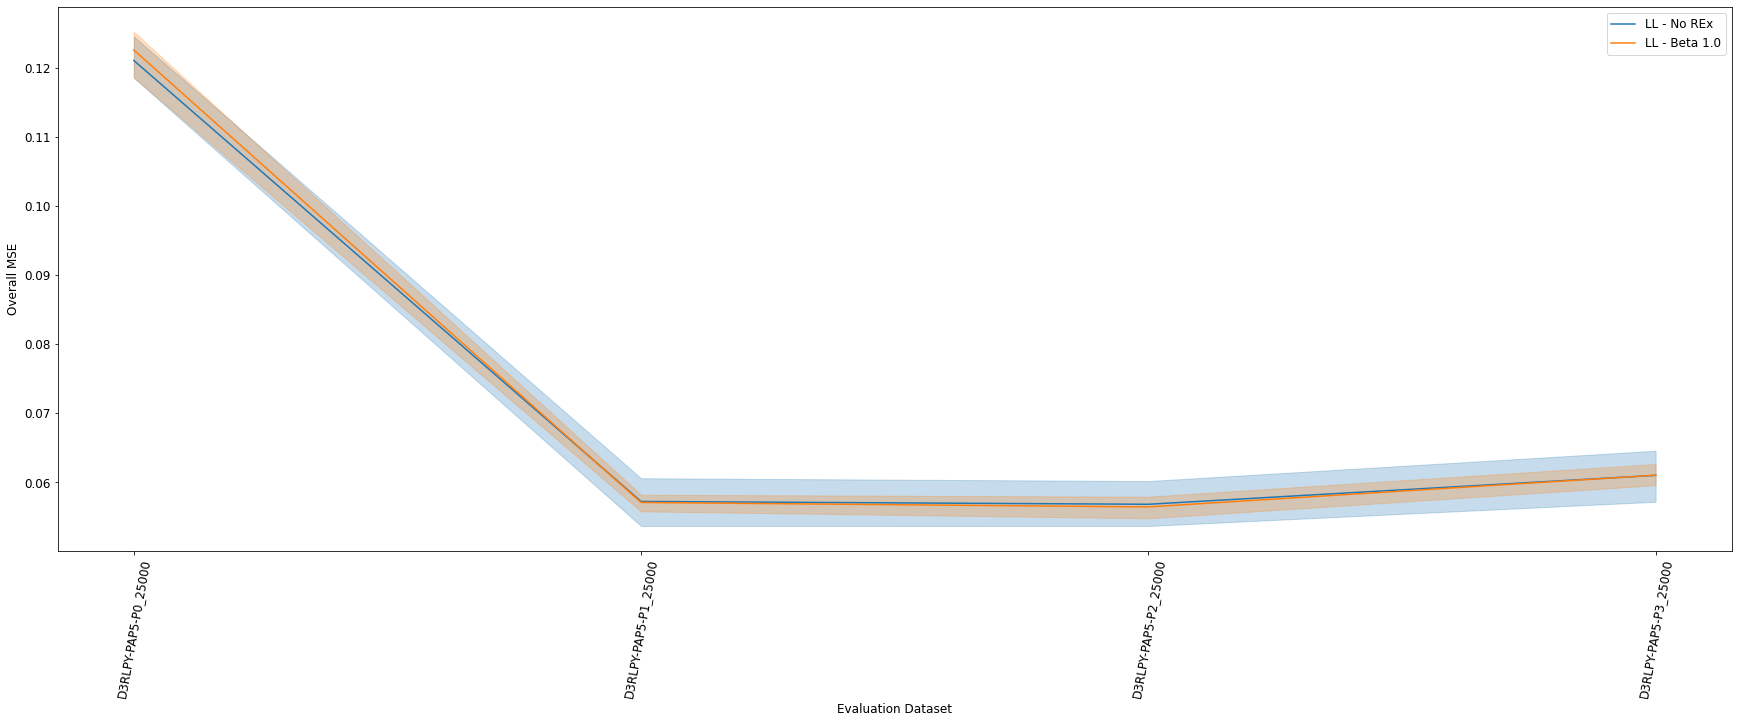

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['LL - No REx', 'LL - Beta 1.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_ll_no_rex_avgs_df, scores_ll_no_rex_mins_df, scores_ll_no_rex_maxs_df),
    (scores_ll_avgs_df, scores_ll_mins_df, scores_ll_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

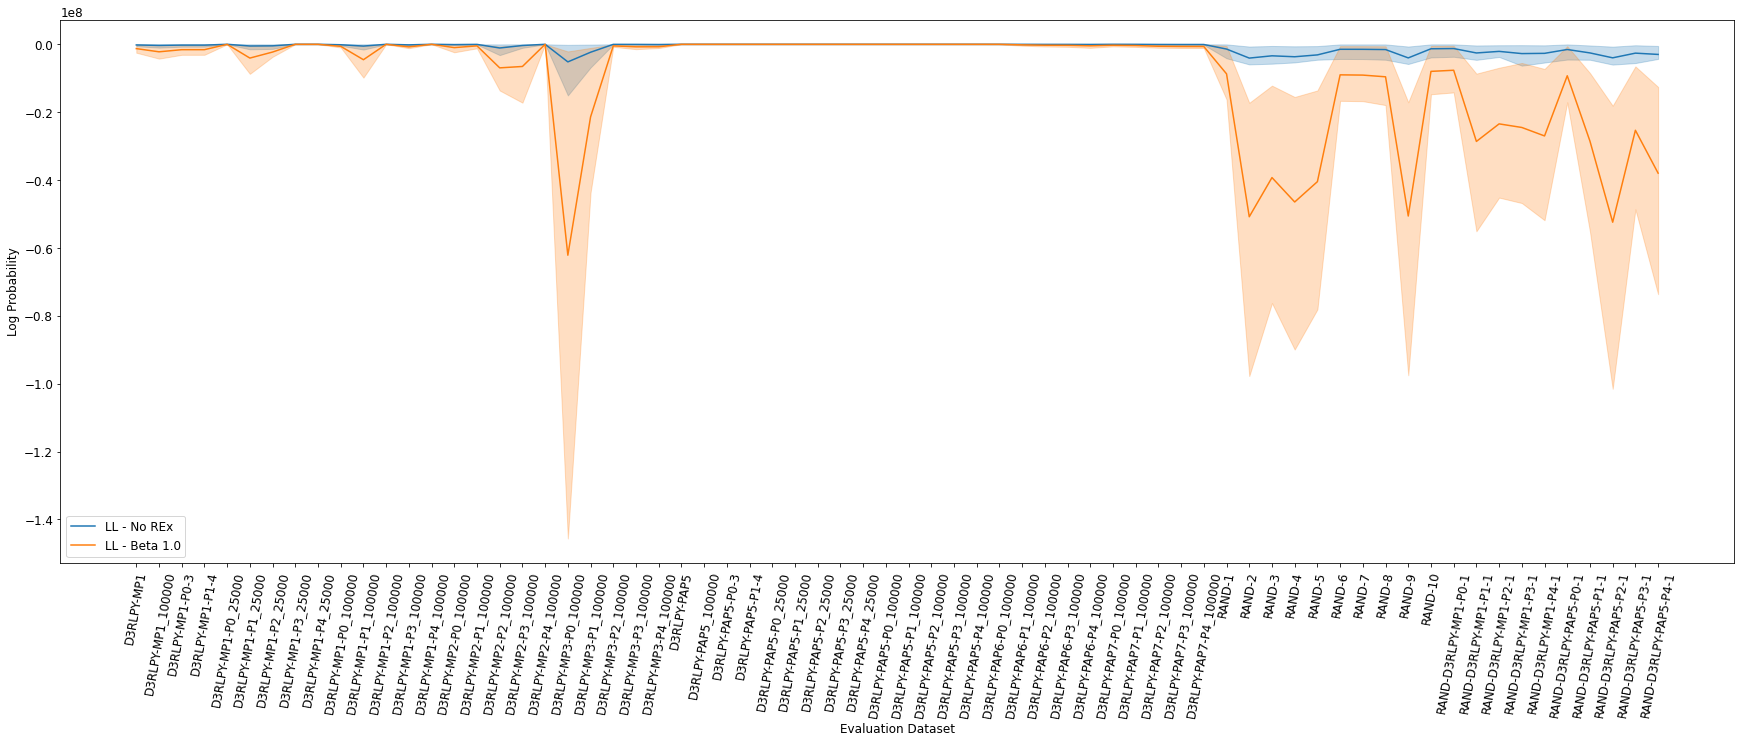

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['LL - No REx', 'LL - Beta 1.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_ll_no_rex_avgs_df, scores_ll_no_rex_mins_df, scores_ll_no_rex_maxs_df),
    (scores_ll_avgs_df, scores_ll_mins_df, scores_ll_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

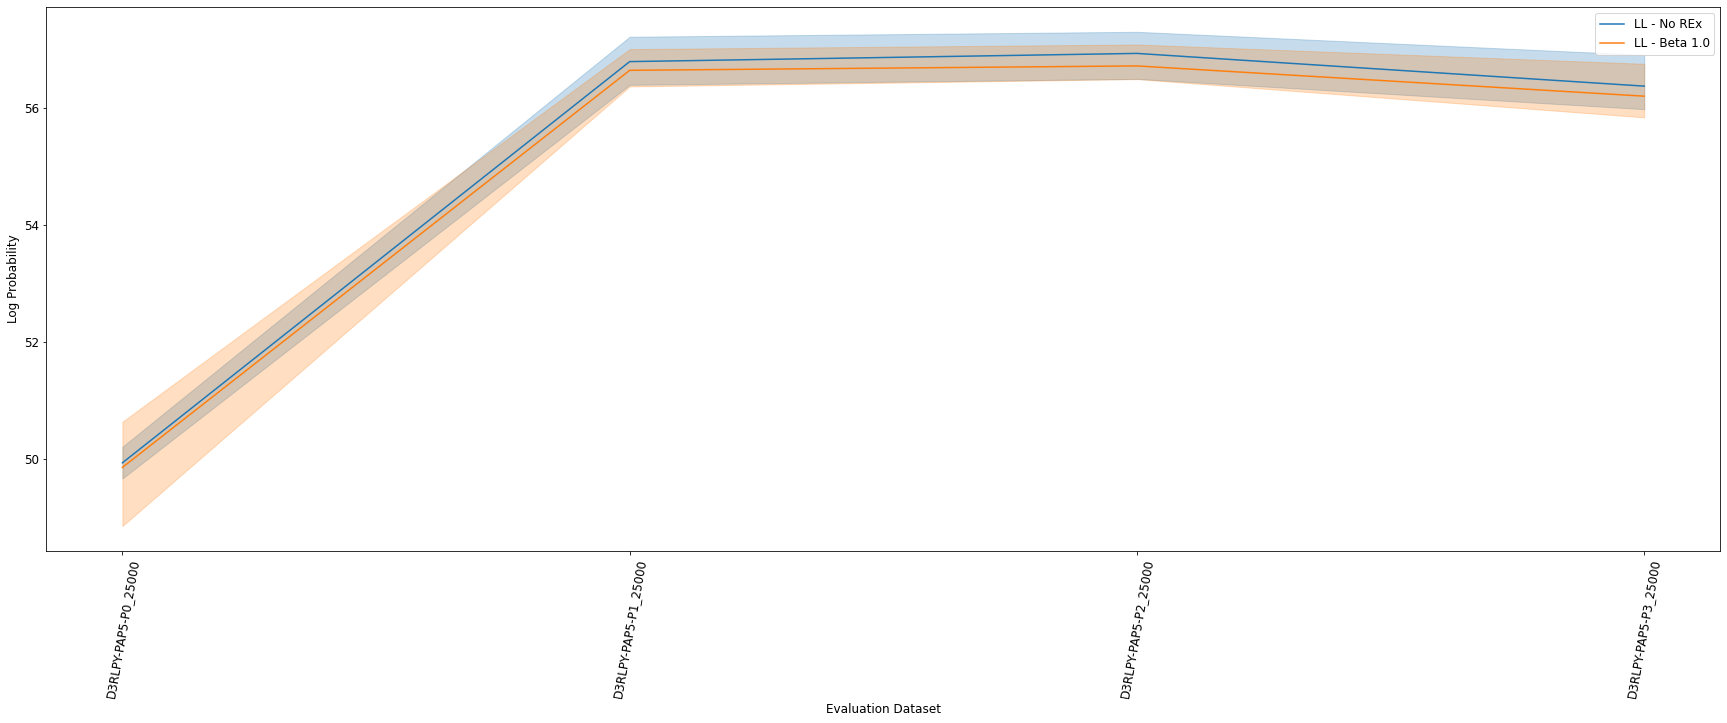

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['LL - No REx', 'LL - Beta 1.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_ll_no_rex_avgs_df, scores_ll_no_rex_mins_df, scores_ll_no_rex_maxs_df),
    (scores_ll_avgs_df, scores_ll_mins_df, scores_ll_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()